## Question 3.11

A study [27] compiled information about the food consumption habits of various fish species (data set: `fishfood`). The fitted linear regression model has the form

$$log(\hat{\mu}) = β_0 + β_1 \log(\text{MaxWt}) + β_2 \log(\text{Temp}) + β_3 \log(\text{AR}) + β_4 \text{Food}$$

where $μ = E[\text{FoodCon}]$ is the predicted daily food consumption as a percentage of biomass, $F = 0$ for carnivores, and $F = 1$ for herbivores, and the other variables are defined in Table 3.7 (not reproducing here as this is just the data, which we'll look at in R).

1. Fit the model used in original study.
2. Perform a diagnostic analysis of this model.
3. Interpret the model.
4. Determine if a better model can be found by considering interaction terms.

### Answers

First load the data.

In [ ]:
install.packages("GLMsData")
library("GLMsData")
data(fishfood)
d <- fishfood

head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Species,MaxWt,Temp,AR,Food,FoodCon
,<fct>,<int>,<int>,<dbl>,<fct>,<dbl>
1,Brevoortia patronus,362,25,1.69,C,2.22
2,Brevoortia tyrannus,1216,18,2.31,H,8.61
3,Engraulis encrasicholus,28,15,1.42,C,2.50
4,Hygophum proximum,2,25,1.65,C,9.28
5,Hygophum reindhardtii,1,25,1.05,C,6.66
6,Lampanyctus alatus,2,25,1.62,C,3.32


#### Answer to 3.11, 1

***Fit the model used in the original study.***

In [ ]:
m_orig <- lm(log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food, data=d)

#### Answer to 3.11, 2

***Perform a diagnositc analysis of this study.***

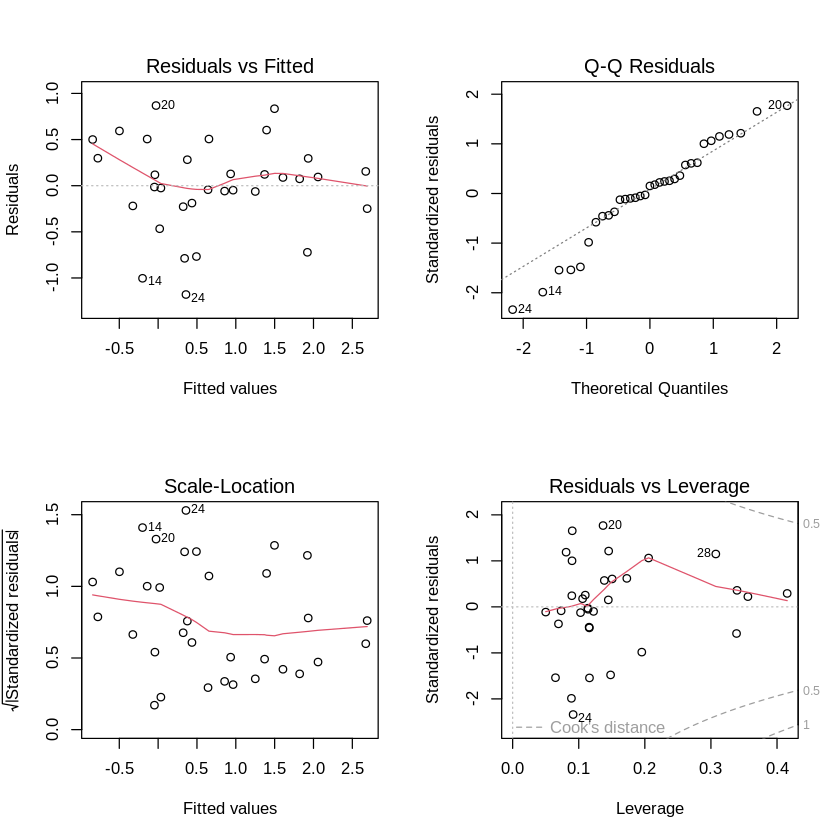

In [ ]:
par(mfrow=c(2,2))
plot(m_orig)

#### Answer to 3.11, 3

***Interpret the model***

The model assumes that the form of $\log(\mu)$ is an additive function of the regressor variables.

#### Answer to 3.11, 4

***Determine if a better model can be found by considering interaction terms.***

In [ ]:
m2 <- lm(log(FoodCon) ~ log(MaxWt) * log(Temp) * log(AR) * Food, data=d)
m3 <- step(m2)

AIC(m_orig, m3)

Start:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) * log(Temp) * log(AR) * Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food + log(MaxWt):log(AR):Food + log(Temp):log(AR):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food + log(MaxWt):log(AR):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + log(AR) + Food + log(MaxWt):log(Temp) + 
    log(MaxWt):log(AR) + log(Temp):log(AR) + log(MaxWt):Food + 
    log(Temp):Food + log(AR):Food + log(MaxWt):log(Temp):log(AR) + 
    log(MaxWt):log(Temp):Food


Step:  AIC=-38.89
log(FoodCon) ~ log(MaxWt) + log(Temp) + 

,df,AIC
,<dbl>,<dbl>
m_orig,6,58.16817
m3,8,51.46982


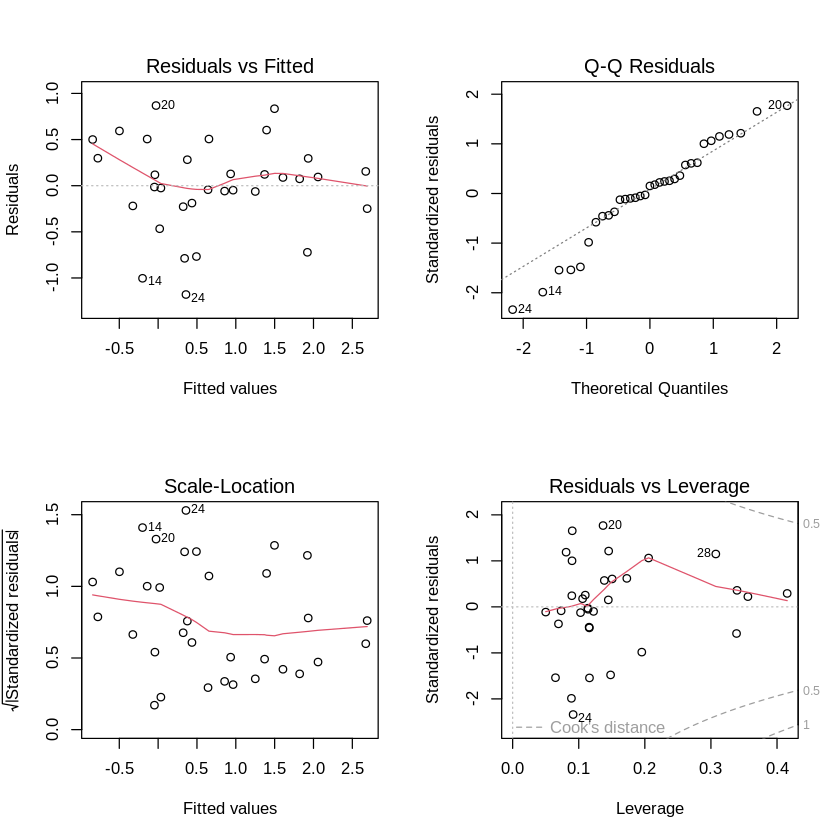

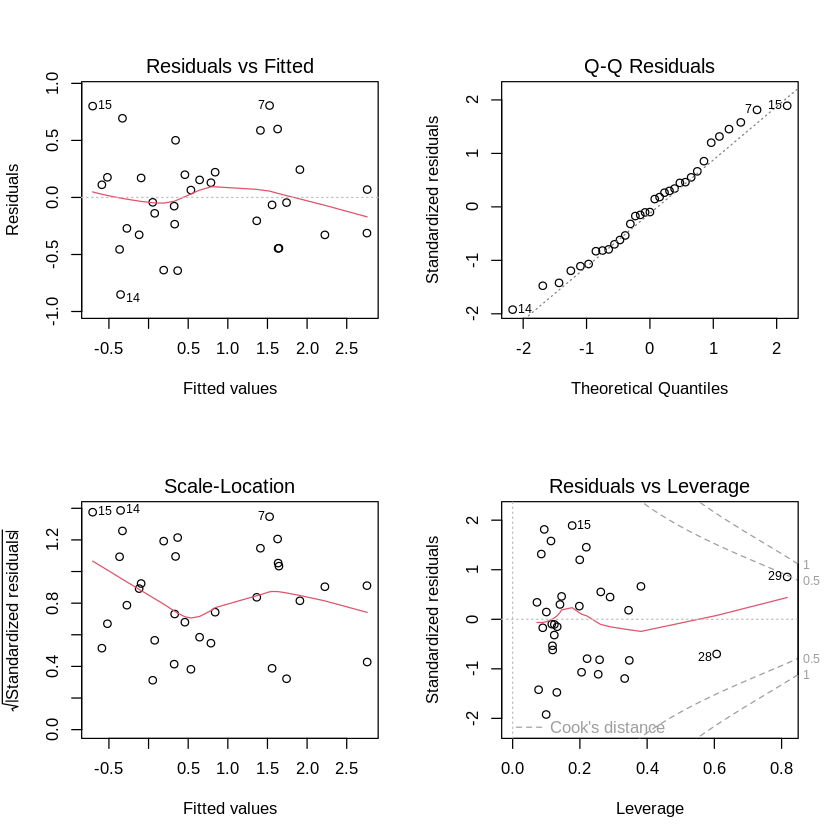

In [ ]:
par(mfrow=c(2,2))
plot(m_orig)

par(mfrow=c(2,2))
plot(m3)

## Question 3.12

In a study [24] of the feed of ruminants, the data in Table 3.8 were collected (data set: `ruminant`; won't reproduce the Table here since it is `data(ruminant)`). The purpose of the study was to model the digestible energy content, and explore the relationships with percentage dry matter digestibility and percentage energy digestibility.

1. Plot the digestible energy content against the other two variables, and comment on the relationships.
2. Compute the correlations between the three variables, and comment.
3. Fit a suitable simple linear regression model.
4. Perform a diagnostic analysis. In particular, one observation is different to the others: does the observation have a large residual or a high leverage?

### Answers

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(ruminant)
d <- ruminant
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,DryMatterDigest,EnergyDigest,Energy
,<dbl>,<dbl>,<dbl>
1,30.5,27.8,1.243
2,63.0,61.5,2.750
3,62.8,60.4,2.701
4,50.0,49.5,2.213
5,60.3,58.7,2.681
6,64.1,63.0,2.877


#### Answer to 3.12, 1

***Plot the digestible energy content against the other two variables, and comment on the relationships.***

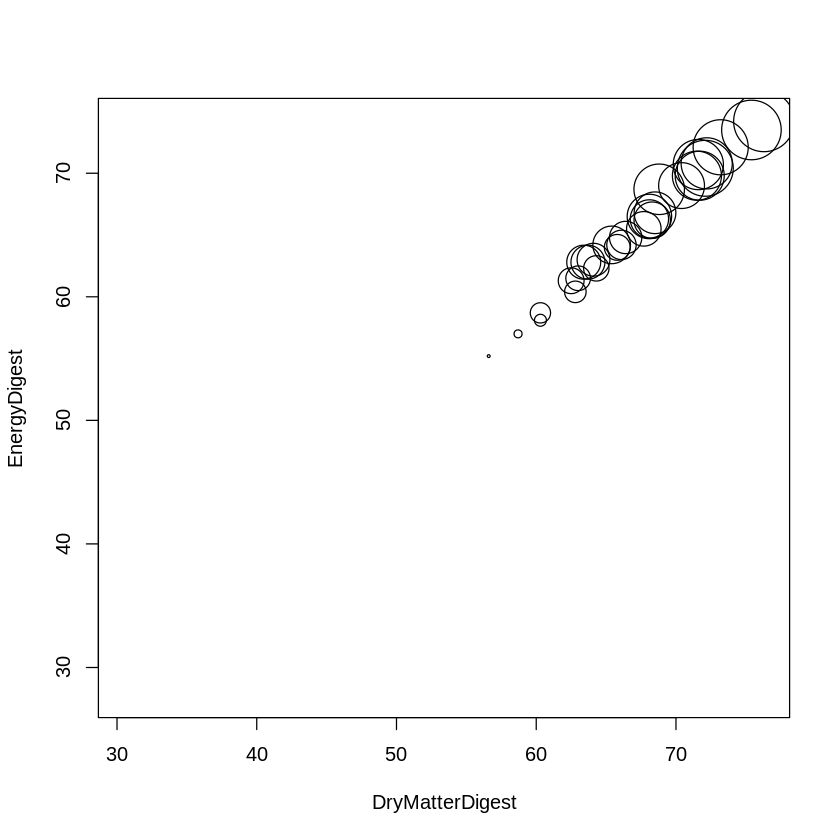

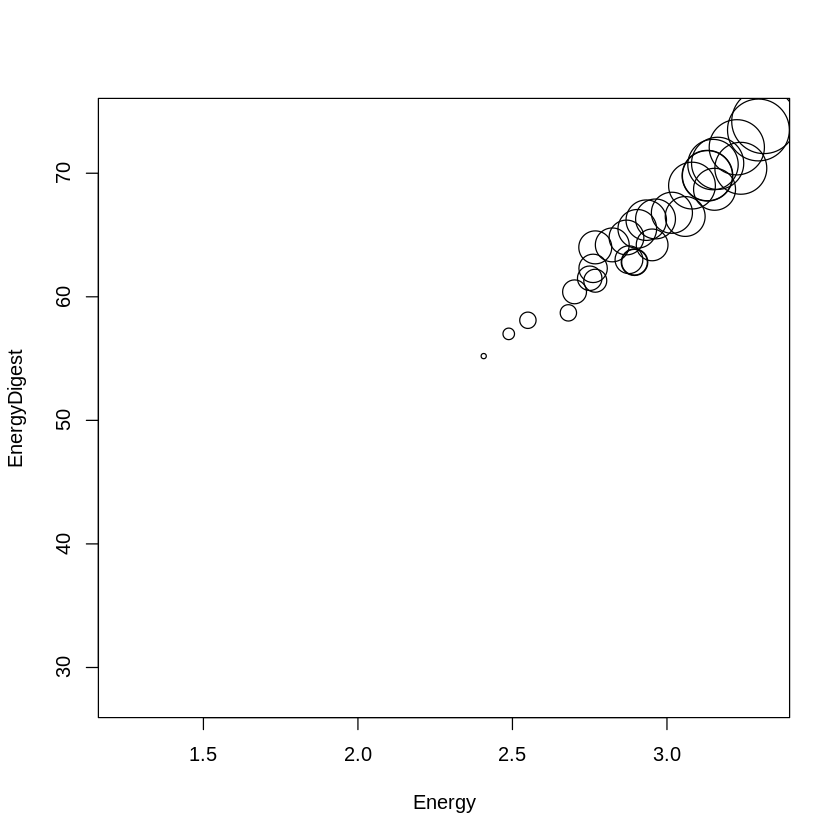

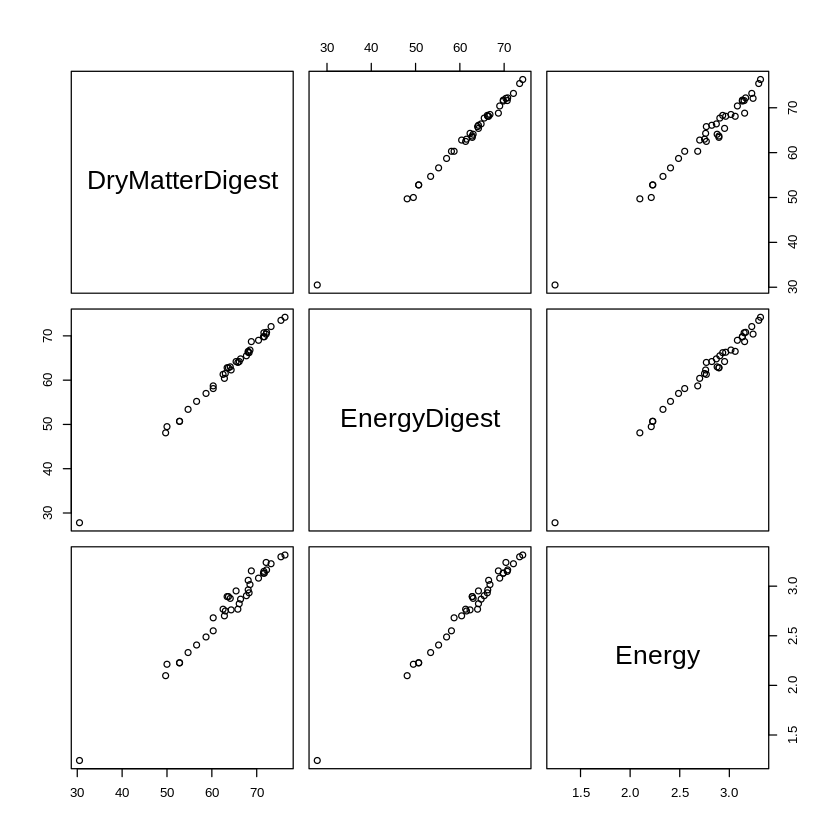

In [ ]:
plot(EnergyDigest ~ DryMatterDigest,
     cex=3*(Energy-mean(Energy))/sd(Energy)+3,
     data=d)
plot(EnergyDigest ~ Energy,
     cex=3*(DryMatterDigest-mean(DryMatterDigest))/sd(DryMatterDigest)+3,
     data=d)

pairs(d)

There is a pretty linear relationship among all 3 variables.

#### Answer to 3.12, 2

***Compute the correlations between the three variables, and comment.***

In [ ]:
round(cor(d),2)

,DryMatterDigest,EnergyDigest,Energy
DryMatterDigest,1.00,1.00,0.99
EnergyDigest,1.00,1.00,0.99
Energy,0.99,0.99,1.00


As expected from the plots, the correlations are very strong and positive.

#### Answer to 3.12, 3

***Fit a suitable simple linear regression model.***

In [ ]:
m <- lm(EnergyDigest ~ DryMatterDigest + Energy, d)
mx <- lm(EnergyDigest ~ DryMatterDigest * Energy, d)
summary(m)
summary(mx)


Call:
lm(formula = EnergyDigest ~ DryMatterDigest + Energy, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82585 -0.24881 -0.07536  0.21605  0.78055 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.07937    0.51148  -2.110   0.0425 *  
DryMatterDigest  0.71780    0.04968  14.450 7.91e-16 ***
Energy           6.28508    1.05307   5.968 1.06e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3864 on 33 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9982 
F-statistic:  9645 on 2 and 33 DF,  p-value: < 2.2e-16



Call:
lm(formula = EnergyDigest ~ DryMatterDigest * Energy, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67668 -0.22539 -0.04035  0.24335  0.69423 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.283469   1.357388  -3.156  0.00348 ** 
DryMatterDigest         0.770184   0.050556  15.234 3.21e-16 ***
Energy                  7.802764   1.147690   6.799 1.10e-07 ***
DryMatterDigest:Energy -0.024069   0.009553  -2.519  0.01694 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3584 on 32 degrees of freedom
Multiple R-squared:  0.9986,	Adjusted R-squared:  0.9984 
F-statistic:  7474 on 3 and 32 DF,  p-value: < 2.2e-16


#### Answer to 3.12, 4

***Perform a diagnostic analysis. In particular, one observation is different to the others: does the observation have a large residual or a high leverage?***

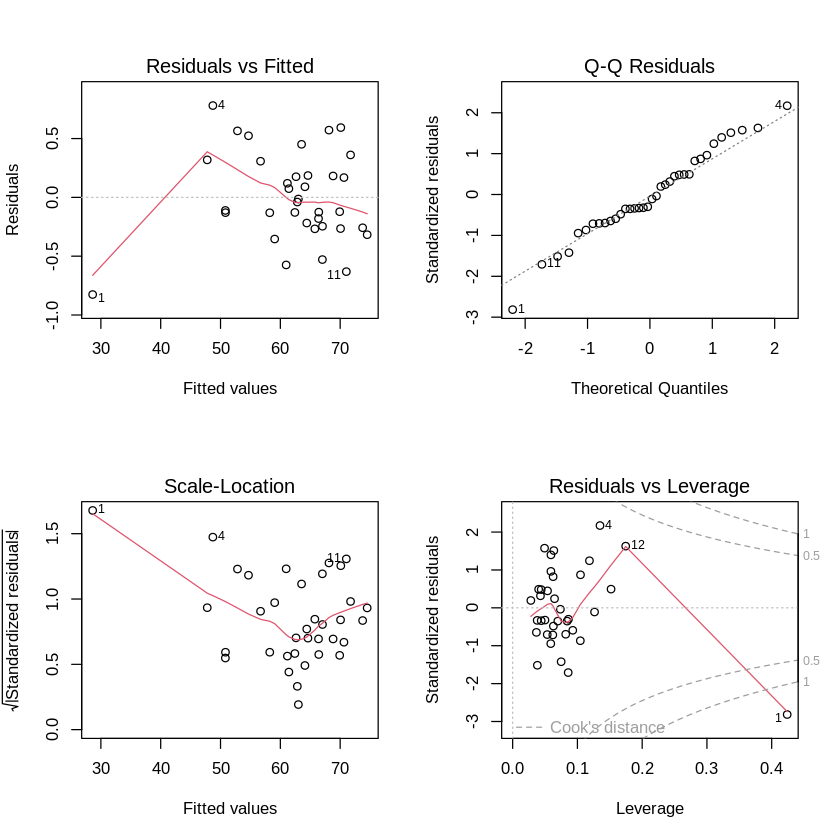

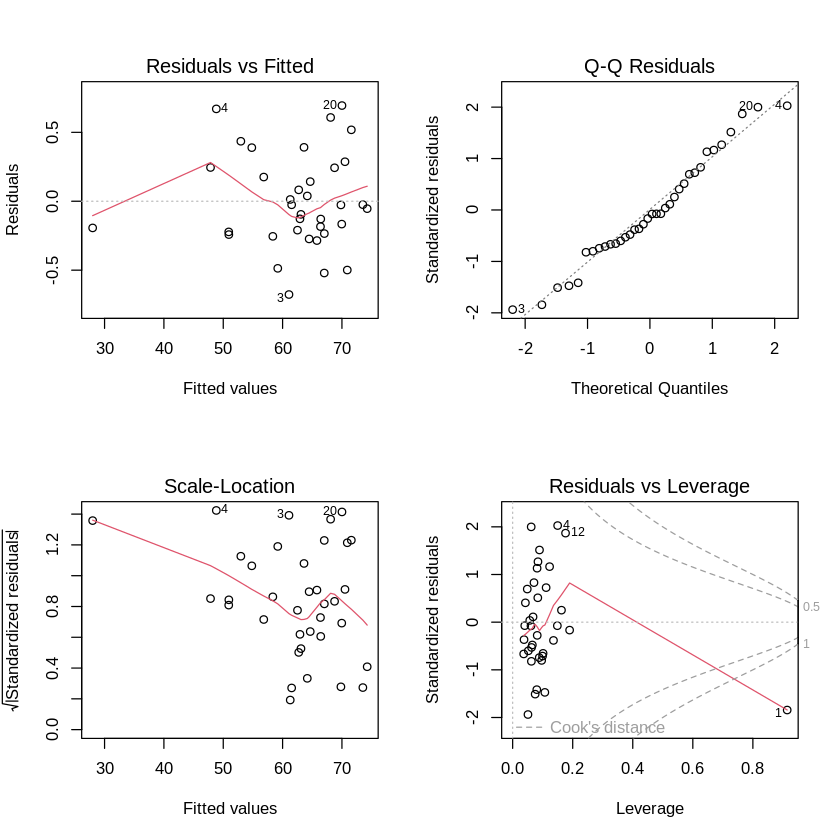

In [ ]:
par(mfrow=c(2,2))
plot(m)

par(mfrow=c(2,2))
plot(mx)

Indeed, observation 1 is the weirdo.  It has both a large residual and large leverage.

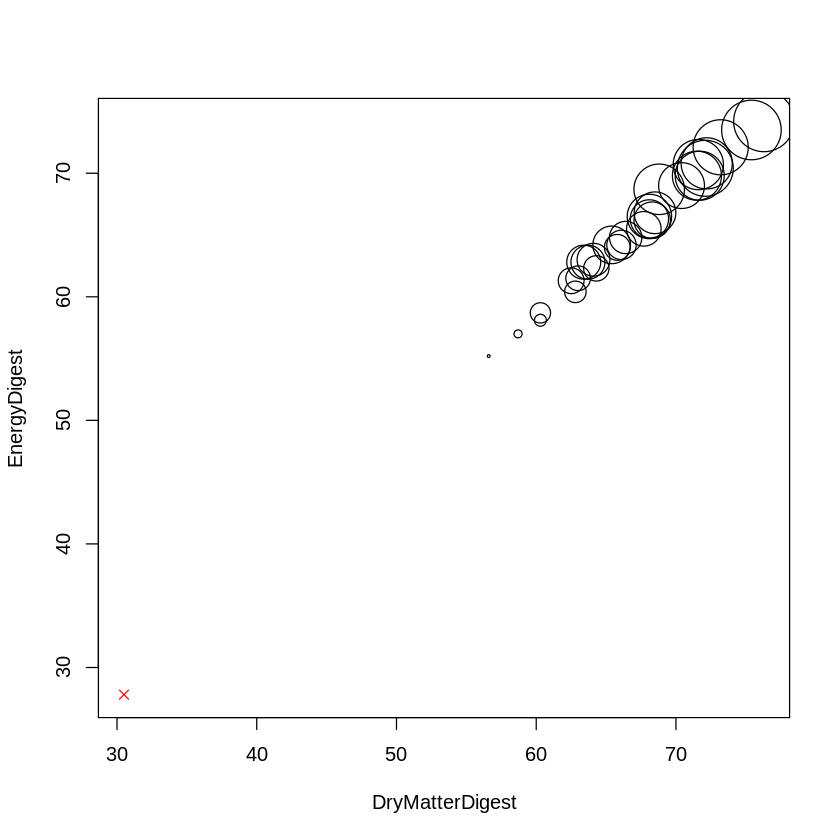

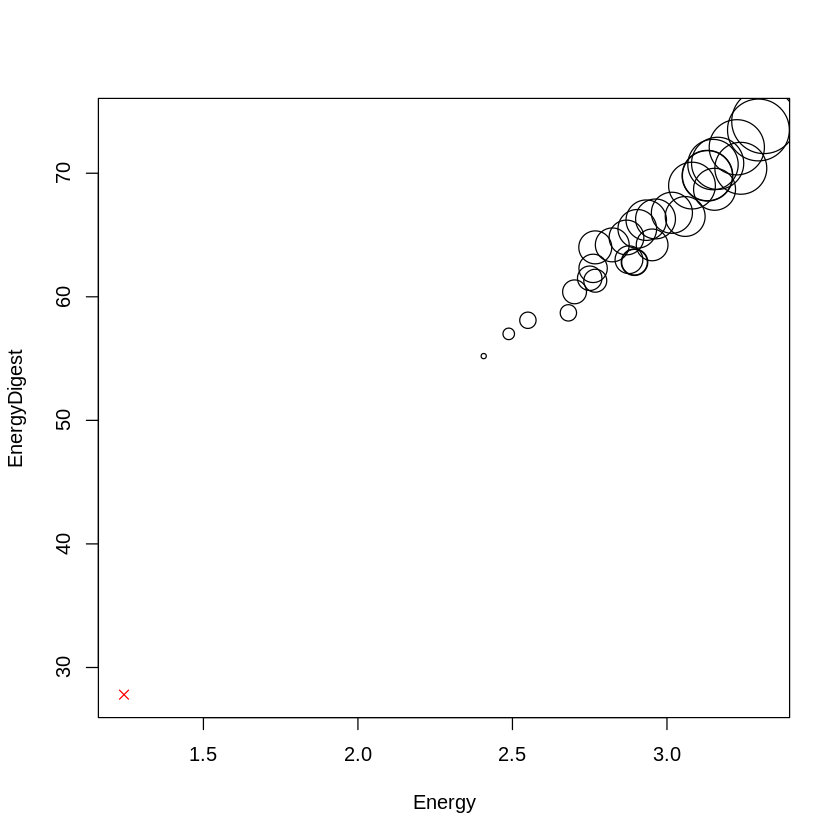

In [ ]:
plot(EnergyDigest ~ DryMatterDigest,
     cex=3*(Energy-mean(Energy))/sd(Energy)+3,
     data=d)
points(d[1, "EnergyDigest"] ~ d[1, "DryMatterDigest"], pch=4, col="red")
plot(EnergyDigest ~ Energy,
     cex=3*(DryMatterDigest-mean(DryMatterDigest))/sd(DryMatterDigest)+3,
     data=d)
points(d[1, "EnergyDigest"] ~ d[1, "Energy"], pch=4, col="red")

This observation was so small in terms of each variable that it didn't even show up on our initial graph.  

## Question 3.13

An experiment was conducted [30] to determine how to maximize meadowfoam flower production. The data and a fuller description are given in Problem 2.15 (data set: `flowers`). In that problem, a linear regression model was fitted to the data.

1. Perform a diagnostic analysis on the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Interpret the final model.

### Answers

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(flowers)
d <- flowers
head(d)

,Flowers,Light,Timing
,<dbl>,<int>,<fct>
1,62.4,150,PFI
2,77.1,150,PFI
3,77.7,150,Before
4,75.4,150,Before
5,55.7,300,PFI
6,54.2,300,PFI


In [ ]:
m <- lm(Flowers ~ Light+Timing, data=d)
mx <- lm(Flowers ~ Light*Timing, data=d)

#### Answer to 3.13, 1

***Perform a diagnostic analysis on the fitted linear regression model.***

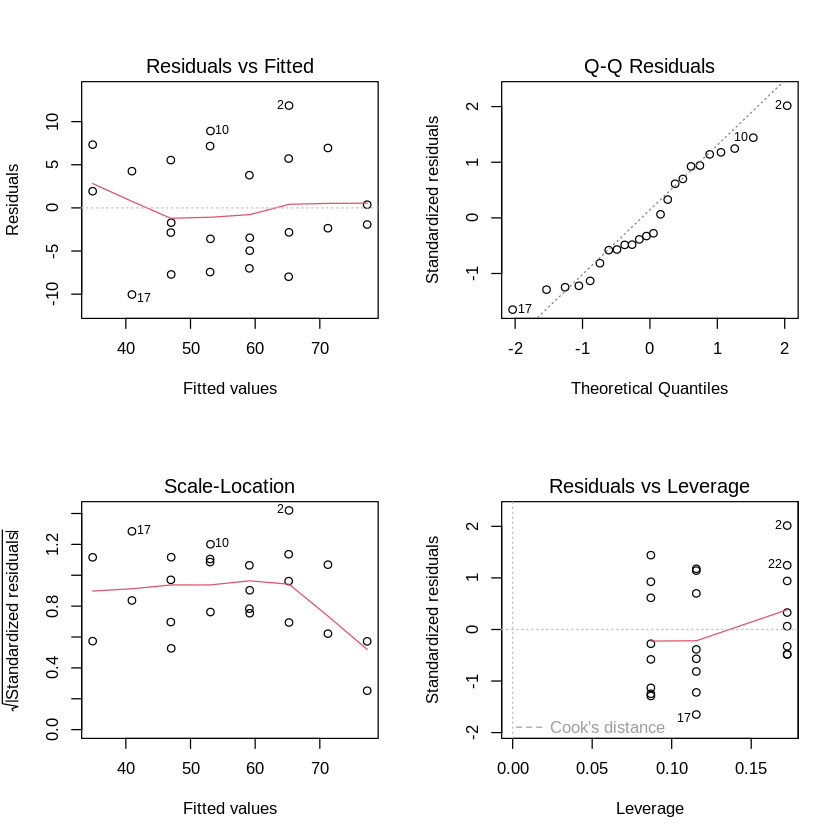

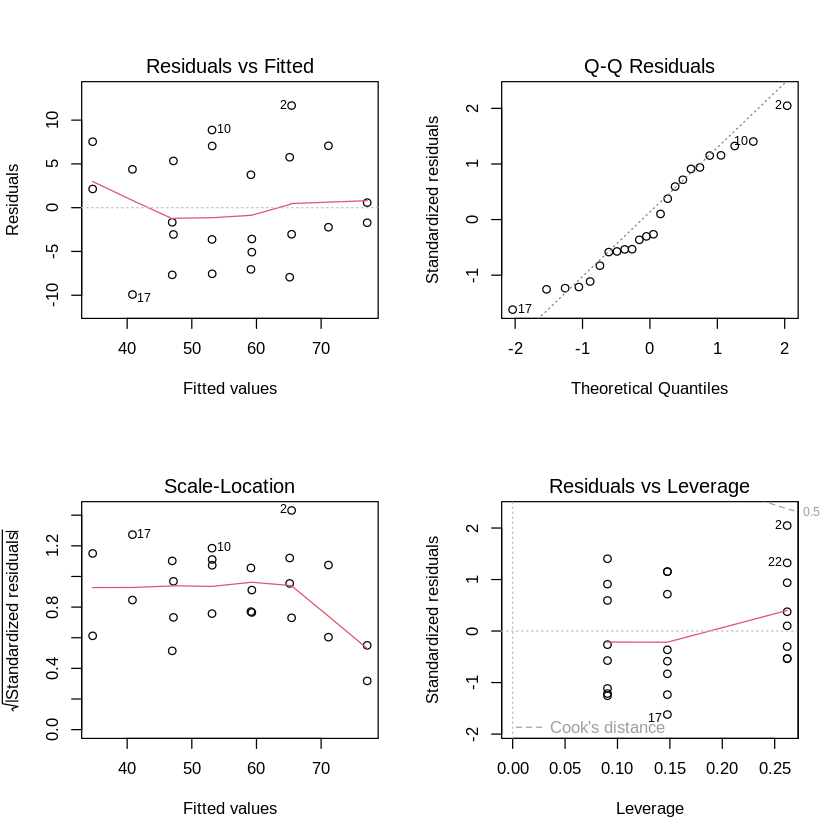

In [ ]:
par(mfrow=c(2,2))
plot(m)

par(mfrow=c(2,2))
plot(mx)

#### Answer to 3.13, 2

***Identify any influential observations or outliers.***

In [ ]:
# Standardized Residuals
m_residuals.standardized <- rstandard(m)
mx_residuals.standardized <- rstandard(mx)

# Leverage (Hat Values)
m_leverage <- hatvalues(m)
mx_leverage <- hatvalues(mx)

# Cook's Distance
m_cooks.distance <- cooks.distance(m)
mx_cooks.distance <- cooks.distance(mx)

# Making a composite variable with leverage and standardized residuals
infl_m <- data.frame(
  dist = round(sqrt(m_leverage^2 + m_residuals.standardized^2), 2),
  cook = round(m_cooks.distance, 2),
  cook_rank = rank(-m_cooks.distance, ties.method="first")
)

# Sort infl_m by dist_lev in descending order
infl_m <- infl_m[order(-infl_m$dist), ]
infl_m

# Create similar data frame for mx model
infl_mx <- data.frame(
  dist = round(sqrt(mx_leverage^2 + mx_residuals.standardized^2), 2),
  cook = round(mx_cooks.distance, 2),
  cook_rank = rank(-mx_cooks.distance, ties.method="first")
)

# Sort infl_mx by dist_lev in descending order
infl_mx <- infl_mx[order(-infl_mx$dist), ]
infl_mx

,dist,cook,cook_rank
,<dbl>,<dbl>,<int>
2,2.02,0.28,1
17,1.65,0.12,2
10,1.44,0.07,4
11,1.29,0.05,9
22,1.26,0.11,3
13,1.25,0.05,10
20,1.23,0.06,5
19,1.18,0.06,7
8,1.15,0.06,8


,dist,cook,cook_rank
,<dbl>,<dbl>,<int>
2,2.06,0.37,1
17,1.63,0.11,3
10,1.41,0.05,8
22,1.35,0.16,2
11,1.26,0.04,9
20,1.24,0.07,5
13,1.22,0.04,10
8,1.16,0.06,6
19,1.16,0.06,7


#### Answer to 3.13, 3

***Interpret the final model.***

I don't like these vague questions.  The final model(s) are simply that the outcome is a linear combination of the predictor variables.

## Question 3.14

A study [15] of the effect of Manuka honey of the healing of wounds collected data from 20 wounds from 17 individuals (Table 3.9; data set: `manuka`).

1. Plot the percentage reduction in wound size over 2 weeks against the initial pH.
2. Fit the corresponding regression equation, and draw the regression line on the plot.
3. Write down the regression model. Interpret the model. (This led to one of the main conclusions of the paper.)

Later, a retraction notice was issued for the article [16] which stated that:

> *The regression results presented. . . are strongly influenced by a high outlying value. . .When the results for this patient are omitted, the association is no longer statistically significant. . . As this relationship is pivotal to the conclusions of the paper, it is felt that the interests of patient care would be best served by a retraction.*

4. Perform a diagnostic analysis of the model fitted above. Identify the observation that is influential.
5. Refit the regression model without this influential observation, and write down the model. Interpret the model, and compare to your interpretation of the previous model.
6. Plot this regression line on the plot generated above. Compare the two regression lines, and comment.

### Answers

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(manuka)
d <- manuka
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Aetiology,Duration,Size0,Size2,pH0,pH2
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,V,52,4.3,4.0,7.26,7.15
2,V,52,2.4,1.5,7.63,7.15
3,V,52,7.3,2.9,7.63,7.50
4,V,2,4.3,1.4,7.18,7.15
5,V,52,3.5,0.1,7.75,6.69
6,V,12,10.3,6.0,7.94,7.56


#### Answer to 3.14, 1

***Plot the percentage reduction in wound size over 2 weeks against the initial pH.***

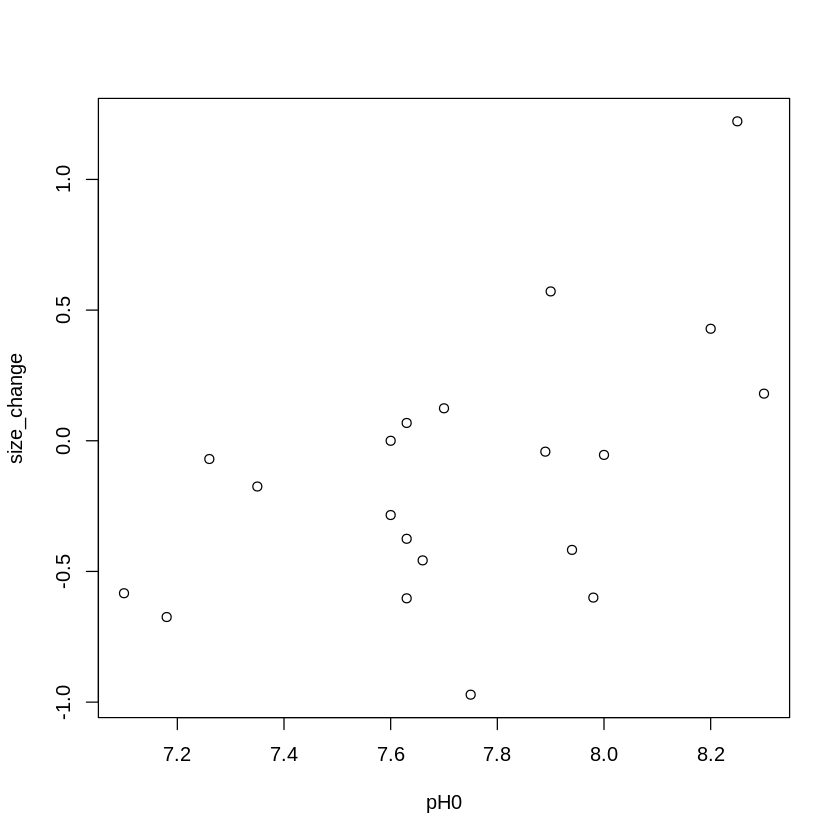

In [ ]:
d$size_change <- (d$Size2 - d$Size0) / d$Size0

plot(size_change ~ pH0, data=d)

#### Answer to 3.13, 2

***Fit the corresponding regression equation, and draw the regression line on the plot.***


Call:
lm(formula = size_change ~ pH0, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85382 -0.18816 -0.04131  0.26708  0.94031 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -6.3101     2.2747  -2.774   0.0125 *
pH0           0.7990     0.2941   2.717   0.0141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4347 on 18 degrees of freedom
Multiple R-squared:  0.2908,	Adjusted R-squared:  0.2514 
F-statistic: 7.382 on 1 and 18 DF,  p-value: 0.01413


[1] 7.897188

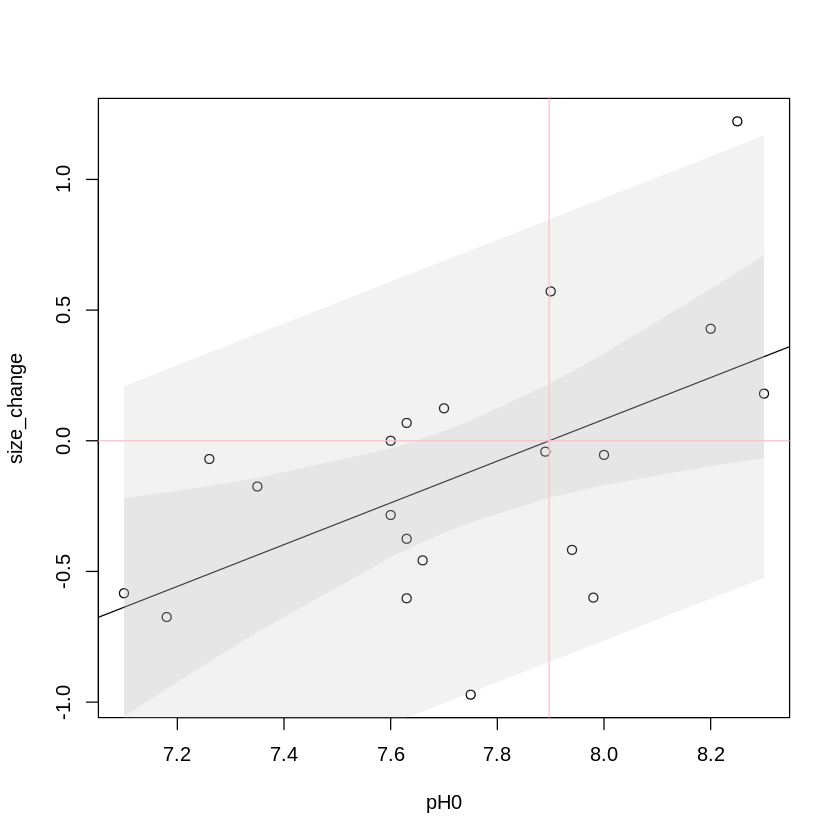

In [ ]:
m <- lm(size_change ~ pH0, data=d)
(m_summary <- summary(m))
(threshold <- -coef(m)[[1]] / coef(m)[[2]])

pred <- predict(m, interval = "confidence", level = 0.95, se.fit = TRUE)
upper <- pred$fit + 2 * pred$se.fit
lower <- pred$fit - 2 * pred$se.fit
residual_sd <- sd(residuals(m))
upper_sd <- pred$fit + 2 * residual_sd
lower_sd <- pred$fit - 2 * residual_sd
ord <- order(d$pH0)

plot(size_change ~ pH0, data=d)
abline(m)
polygon(c(d$pH0[ord], rev(d$pH0[ord])), c(upper[ord], rev(lower[ord])),
        col = adjustcolor("grey", 0.2), border = NA)
polygon(c(d$pH0[ord], rev(d$pH0[ord])), c(upper_sd[ord], rev(lower_sd[ord])),
        col = adjustcolor("grey", 0.2), border = NA)
abline(h=0, col="pink")
abline(v=threshold, col="pink")

#### Answer to 3.14, 3

***Write down the regression model. Interpret the model. (This led to one of the main conclusions of the paper.)***

The model can be read out by from, well, the model: `m <- size_change ~ pH0`.  The major finding is that expected wound size increases with `pH0`; the wound size is expected to decrease within two weeks up to `pH0 = ~7.9`, and increase thereafter.

#### Answer to 3.14, 4

***Perform a diagnostic analysis of the model fitted above. Identify the observation that is influential.***

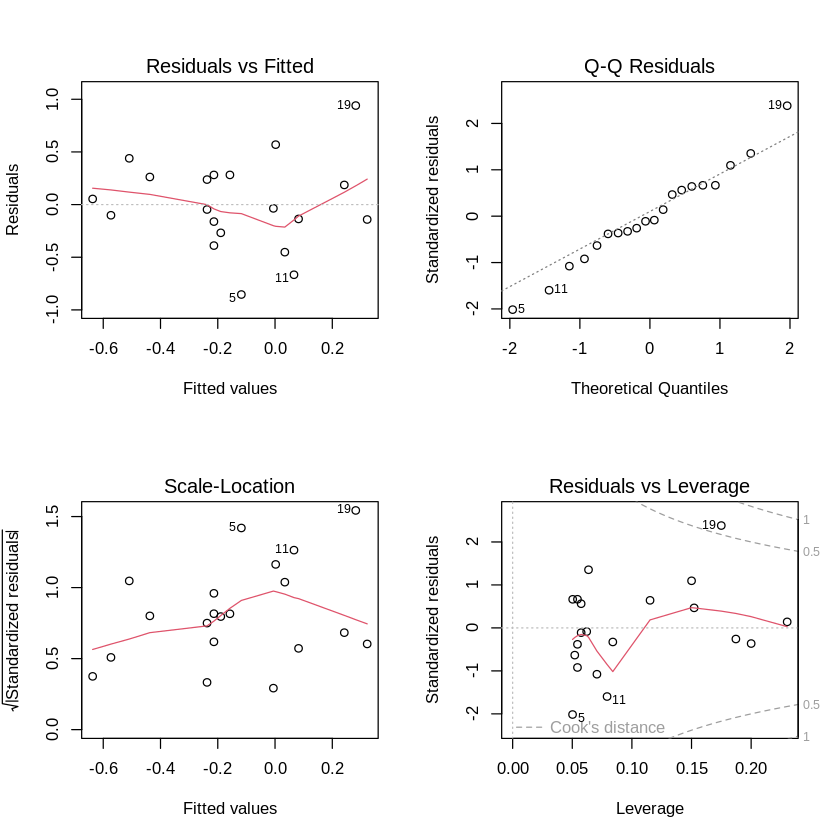

In [ ]:
par(mfrow=c(2,2))
plot(m)

The possibly offending datapoint, according to the "Residuals vs Leverage" plot, is observation 19.

#### Answer to 3.14, 5 and 6

***Refit the regression model without this influential observation, and write down the model. Interpret the model, and compare to your interpretation of the previous model.***

***Plot this regression line on the plot generated above. Compare the two regression lines, and comment.***


Call:
lm(formula = size_change ~ pH0, data = d_mod)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79070 -0.21157 -0.00494  0.28589  0.67319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -4.2608     2.0711  -2.057   0.0553 .
pH0           0.5265     0.2687   1.959   0.0667 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3702 on 17 degrees of freedom
Multiple R-squared:  0.1842,	Adjusted R-squared:  0.1362 
F-statistic: 3.837 on 1 and 17 DF,  p-value: 0.06673


[1] 8.093286

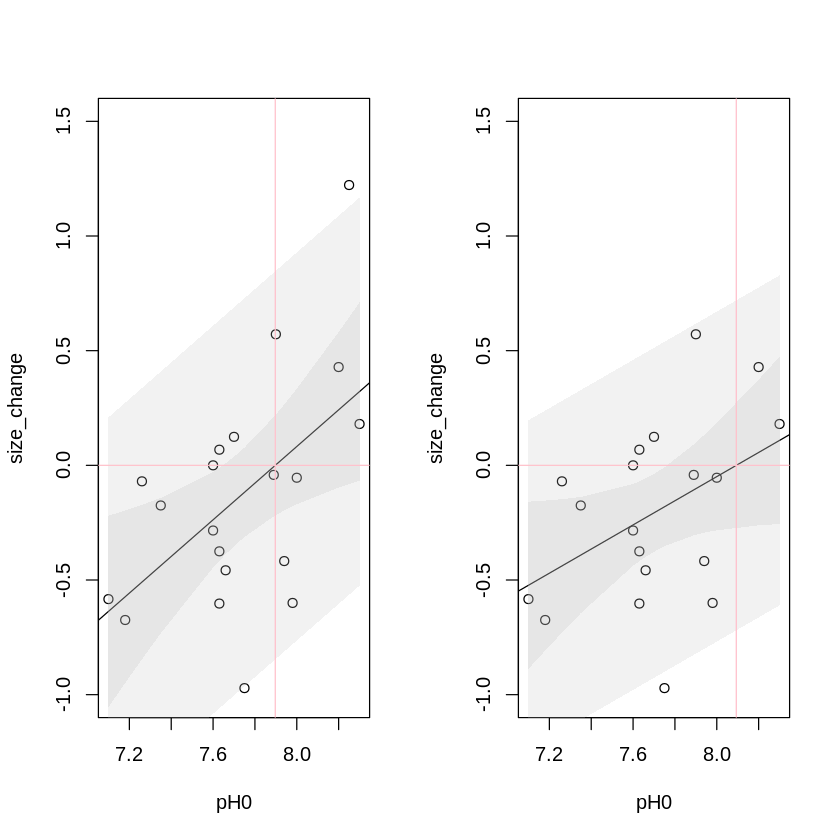

In [ ]:
d_mod <- d[-19, ]

m_mod <- lm(size_change ~ pH0, data = d_mod)
(m_mod_summary <- summary(m_mod))
(threshold_mod <- -coef(m_mod)[[1]] / coef(m_mod)[[2]])

pred_mod <- predict(m_mod, interval = "confidence", level = 0.95, se.fit = TRUE)
upper_mod <- pred_mod$fit + 2 * pred_mod$se.fit
lower_mod <- pred_mod$fit - 2 * pred_mod$se.fit
residual_sd_mod <- sd(residuals(m_mod))
upper_sd_mod <- pred_mod$fit + 2 * residual_sd_mod
lower_sd_mod <- pred_mod$fit - 2 * residual_sd_mod
ord_mod <- order(d_mod$pH0)

par(mfrow=c(1,2))
plot(size_change ~ pH0, ylim=c(-1, 1.5), data=d)
abline(m)
polygon(c(d$pH0[ord], rev(d$pH0[ord])), c(upper[ord], rev(lower[ord])),
        col = adjustcolor("grey", 0.2), border = NA)
polygon(c(d$pH0[ord], rev(d$pH0[ord])), c(upper_sd[ord], rev(lower_sd[ord])),
        col = adjustcolor("grey", 0.2), border = NA)
abline(h=0, col="pink")
abline(v=threshold, col="pink")

plot(size_change ~ pH0, ylim=c(-1, 1.5), data = d_mod)
abline(m_mod)
polygon(c(d_mod$pH0[ord_mod], rev(d_mod$pH0[ord_mod])), c(upper_mod[ord_mod], rev(lower_mod[ord_mod])),
        col = adjustcolor("grey", 0.2), border = NA)
polygon(c(d_mod$pH0[ord_mod], rev(d_mod$pH0[ord_mod])), c(upper_sd_mod[ord_mod], rev(lower_sd_mod[ord_mod])),
        col = adjustcolor("grey", 0.2), border = NA)
abline(h = 0, col = "pink")
abline(v = threshold_mod, col = "pink")

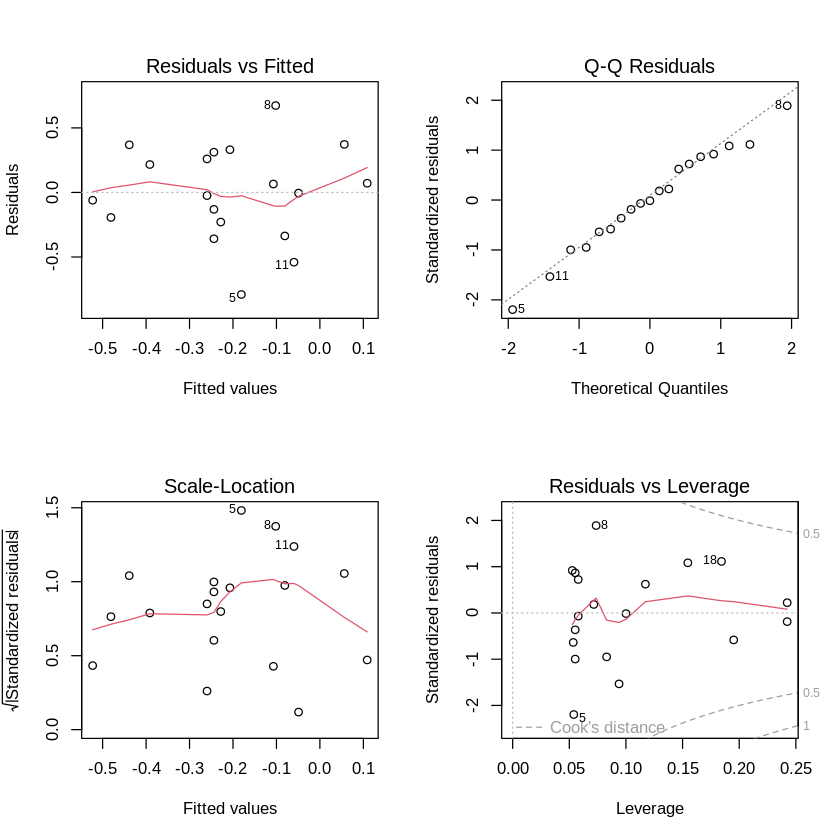

In [ ]:
par(mfrow=c(2,2))
plot(m_mod)

The findings are similar, even after removing the *outlier*.  So I'm not sure that the retraction was necessary.  However, perhaps the authors' model was different than ours, incorporating other/additional predictors.

## Question 3.15

A study of babies [4] hypothesized that babies would take longer to learn to crawl in colder months because the extra clothing restricts their movement (data set: `crawl`). The data and a fuller description are given in Problem 2.16 (p. 87). In that problem, a linear regression model was fitted to the data.

1. Perform a diagnostic analysis of the fitted linear regression model.
2. Identify any influential observations or outliers.
3. Suppose some of the babies were twins. Which assumption would be violated by the inclusion of these babies in the study? Do you think this would have practical implications?

### Answers

In [ ]:
#install.packages("GLMsData")
library(GLMsData)
data(crawl)
d <- crawl

First we need to get the regression from Problem 2.16.

In [ ]:
m <- lm(Age ~ Temp, data=d)

#### Answers to 3.15, 1 and 2

***Perform a diagnostic analysis of the fitted linear regression model.***

***Identify any influential observations or outliers.***

,Hat Values,Cook
1,0.17313784,0.03639585
2,0.27070323,0.03907027
3,0.25459318,0.01909390
4,0.14218481,0.06231945
5,0.08444203,0.27023167
6,0.12915196,0.07119144
7,0.19105801,0.02332651
8,0.23178568,0.03120704
9,0.19105801,0.04316399
10,0.14689112,0.01743236


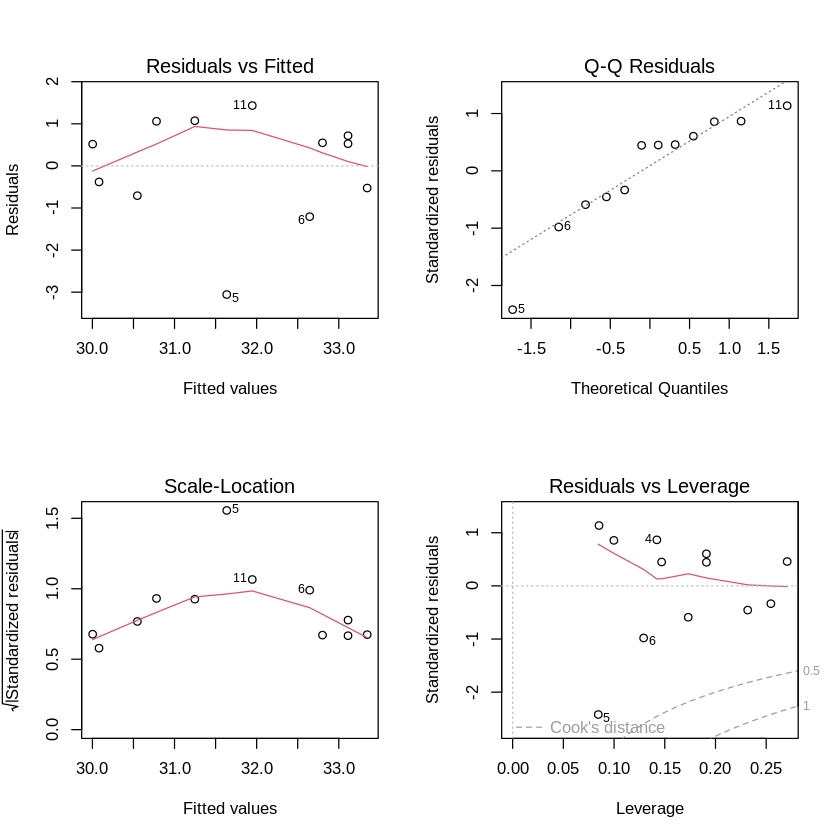

In [ ]:
par(mfrow=c(2,2))
plot(m)

cbind("Hat Values" = hatvalues(m), "Cook" = cooks.distance(m))

Influential observations can be detected by having high Cook's distance, but outliers must have both high influence and high leverage (which can be detected with Hat values).

In our data, high-influential observations tend to have low leverage while high-leverage observations tend to have low influence.  This implies no outliers.  Granted, observation 5 is looking suspicious; we might look at the effects of removing it, but it's not really an outlier.  If you look at its position in the "Residuals vs Fitted" or "Scale-Location" plots, you can see why: although it is anamolous in terms of its residual, it sits right at the center of outcome values (hence, low leverage).

#### Answer to 3.15, 3

***Suppose some of the babies were twins. Which assumption would be violated by the inclusion of these babies in the study? Do you think this would have practical implications?***

Twins will share identical genetics and probably near-identical environments.  Hence, the observations are not independent.  This could have practical implications, especially if there were many sets of twins in the data, because datapoints representing the months wherein twins were born (and thus, the temperature when they were of proper age) would be overrepresented in the data.

## Question 3.16

Children were asked to build towers out of cubical and cylindrical blocks as high as they could [20, 33], and the number of blocks used and the time taken were recorded. The data (data set: `blocks`) and a fuller description are given in Problem 2.18 (p. 88). In that problem, a linear regression model was fitted to model the time to build the towers, based on the initial examination in Problem 1.9 (p. 28).

1. Perform a diagnostic analysis of the linear regression model fitted in Problem 2.18 (p. 88), and show a transformation of the response is necessary.

2. Fit an appropriate linear regression model to the data after applying the transformation, ensuring a diagnostic analysis.

### Answers

Let's call up our regression from Problem 2.18.  Actually, several regressions were fit, so I'll pick one.

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(blocks)
d <- blocks

m_age.shape <- lm(Time ~ Age*Shape, d)

#### Answer to 3.16, 1

***Perform a diagnostic analysis of the linear regression model fitted in Problem 2.18 (p. 88), and show a transformation of the response is necessary.***

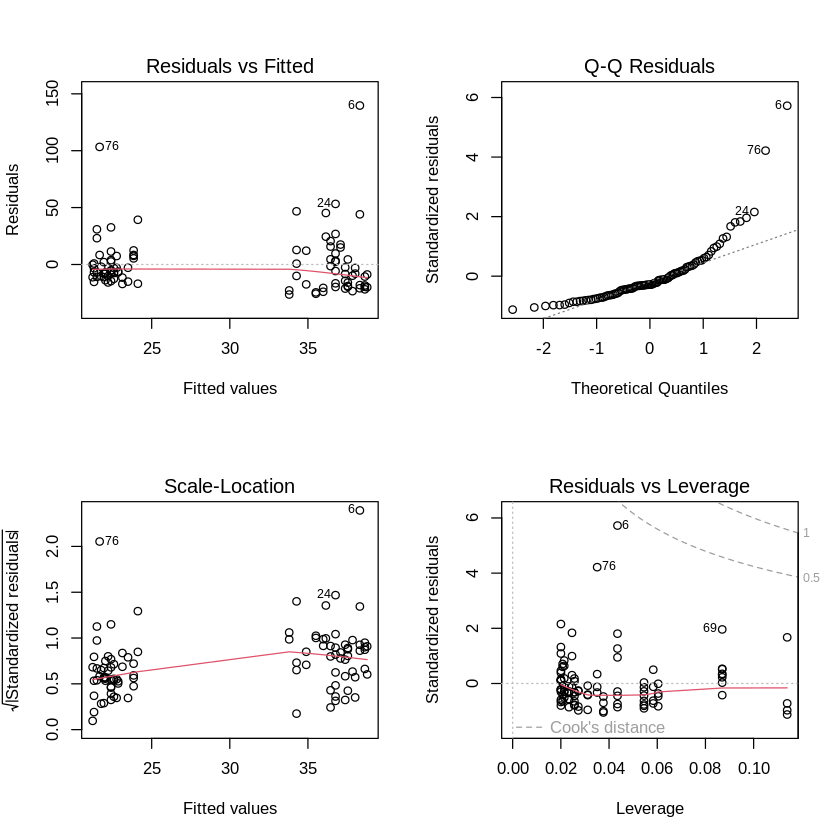

In [ ]:
par(mfrow=c(2,2))
plot(m_age.shape)

#### Answer to 3.16, 2

***Fit an appropriate linear regression model to the data after applying the transformation, ensuring a diagnostic analysis.***

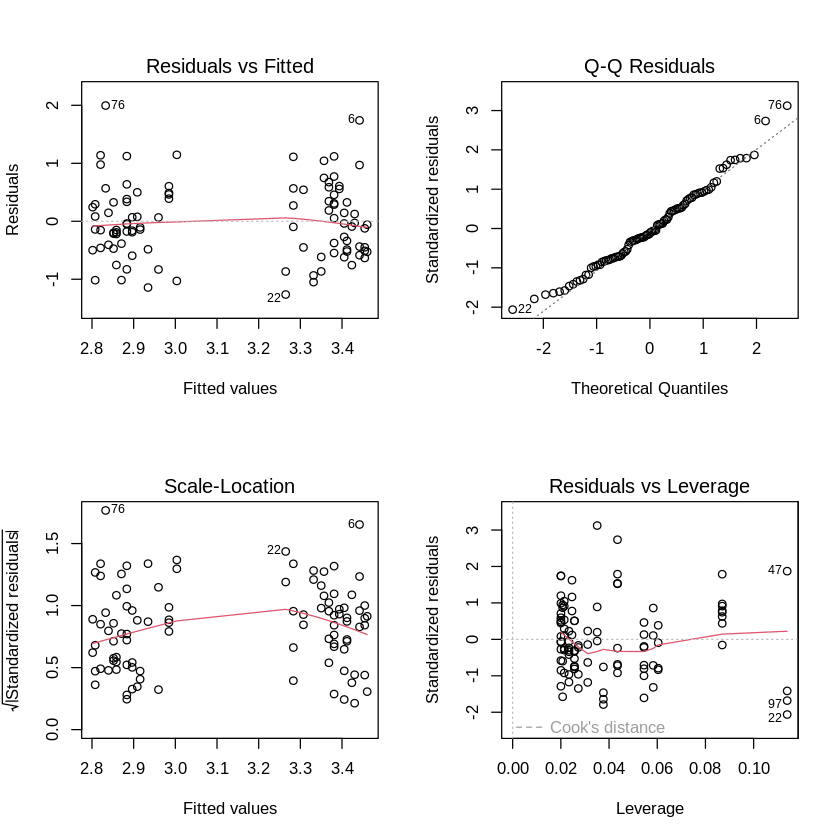

In [ ]:
log.m_age.shape <- lm(log(Time) ~ Age*Shape, d)
par(mfrow=c(2,2))
plot(log.m_age.shape)

In [ ]:
AIC(m_age.shape)
AIC(log.m_age.shape)

[1] 933.0792

[1] 203.7401

## Question 3.17

In Problem 2.17, the daily energy requirements and weight of 64 wethers (Table 2.11; data set: `sheep`) were analysed [18, 38, 42].

1. Using the model fitted in Problem 2.17, perform a diagnostic analysis.
2. Fit another linear regression model using the logarithm of energy requirements as the response variable. Perform a diagnostic analysis of this second model, and show this is a superior model.
3. Interpret the model that was fitted using the logarithm of energy requirements.

### Answers

In [ ]:
#install.packages("GLMsData")
library("GLMsData")

data(sheep)
d <- sheep

#### Answer to 3.17, 1

***Using the model fitted in Problem 2.17, perform a diagnostic analysis.***

Let's first bring back the model from Problem 2.17.

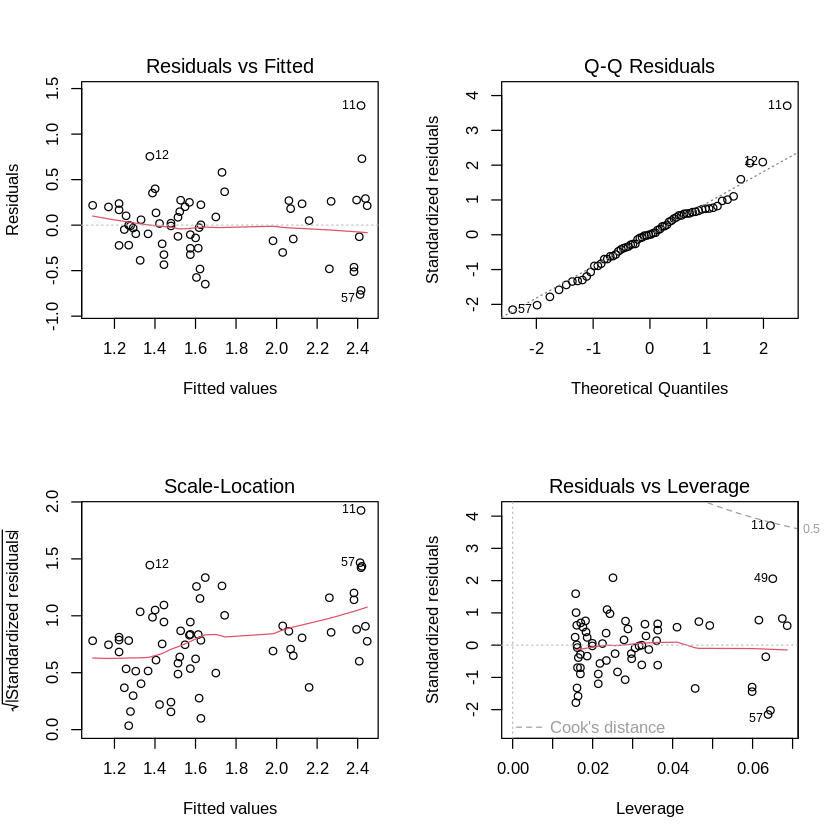

In [ ]:
m <- lm(Energy ~ Weight, d)

par(mfrow=c(2,2))
plot(m)

#### Answer to 3.17, 2

***Fit another linear regression model using the logarithm of energy requirements as the response variable. Perform a diagnostic analysis of this second model, and show this is a superior model.***

[1] 57.01955

[1] -19.81662

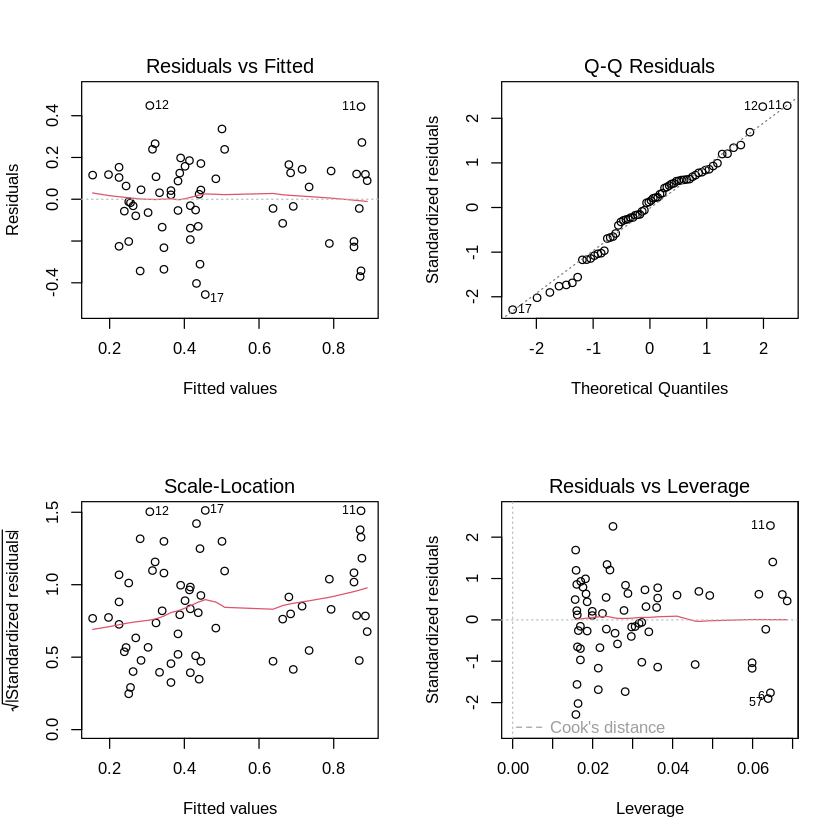

In [ ]:
log_m <- lm(log(Energy) ~ Weight, d)

par(mfrow=c(2,2))
plot(log_m)

AIC(m)
AIC(log_m)

The diagnostics suggest better fit with `log_m`, and the AIC comparison supports this.

#### Answer to 3.17, 3

***Interpret the model that was fitted using the logarithm of energy requirements.***

The log of `Energy` is a linear function of `Weight`.

## Question 3.18

A study [23] measured the body fat percentage and BMI of adults aged between 23 and 61 (Table 3.10; data set: `humanfat`).
1. Plot the data, distinguishing between males and females. Which assumptions, if any, appear to be violated?
2. Fit the linear regression model with systematic component `Percent.Fat ~ Age * Gender` to the data.
3. Write down the two systematic components corresponding to females and males.
4. Interpret each coefficient in this model.
5. Use a t-test to determine if the interaction term is significant.
6. Use an F-test to determine if the interaction term is significant.
7. Show that the P-values for the t- and F-tests are the same for the interaction term, and explain why. Also show that the square of the t-statistic is the F-statistic (within the limitations of computer arithmetic).
8. To the earlier plot, add the separate regression lines for males and females.
9. Compute and plot the 90% confidence intervals about the fitted values for both males and females, and comment
10. Argue that only using the females in the study is sensible. Furthermore, argue that only using females aged over 38 is sensible.
11. Using this subset of the data, find a model using `Age` and `BMI` as explanatory variables.
12. Using this model, compute Cook’s distance, leverages, Studentized residuals and standardized residuals to evaluate the model. Identify any outliers and influential observations, and discuss the differences between the Studentized and standardized residuals.

### Answers

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(humanfat)
d <- humanfat

str(d)

'data.frame':	18 obs. of  4 variables:
 $ Age        : int  23 23 27 27 39 41 45 49 50 53 ...
 $ Percent.Fat: num  9.5 27.9 7.8 17.8 31.4 25.9 27.4 25.2 31.1 34.7 ...
 $ Gender     : Factor w/ 2 levels "F","M": 2 1 2 2 1 1 2 1 1 1 ...
 $ BMI        : num  17.8 22.5 24.6 20.5 25.1 21.4 26 22.3 21.8 28.4 ...


#### Answer to 3.18, 1

***Plot the data, distinguishing between males and females. Which assumptions, if any, appear to be violated?***

We have to make a few decisions here.  We can plot many things in many ways, but I'm going to try to represent the model used in the next part of this question.

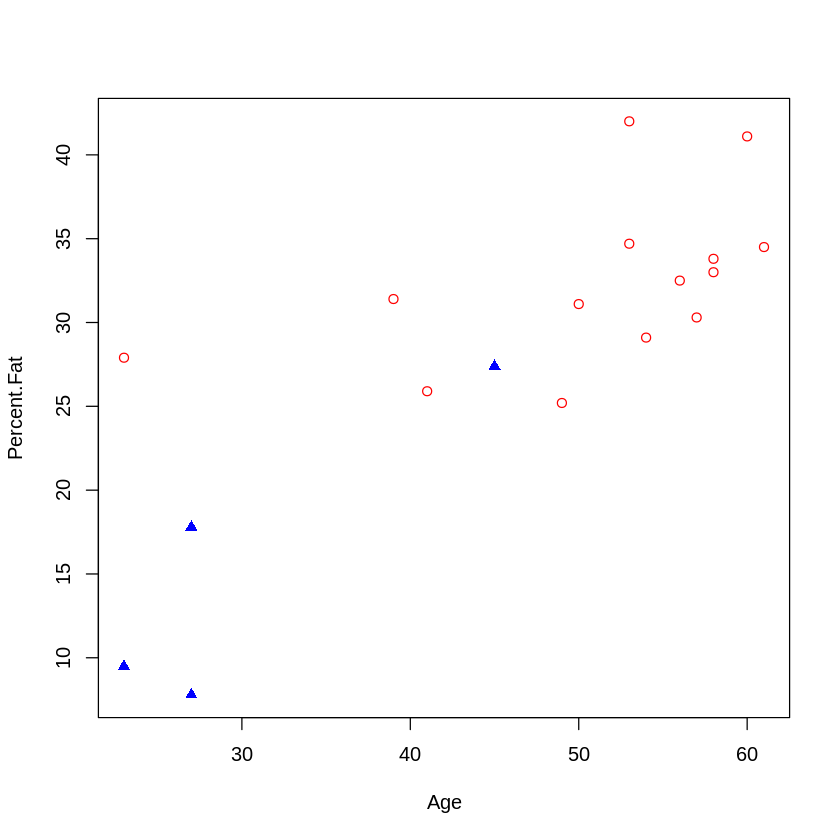

In [ ]:
Gender_colors <- ifelse(d$Gender=="F", "red", "blue")
Gender_pch <- ifelse(d$Gender=="F", 1, 17)
plot(Percent.Fat ~ Age, col=Gender_colors, pch=Gender_pch, data=d)

There appears to be a linear relation for `Age` and `Gender` with `Percent.Fat`.  The variance may be heterogeneous across levels

#### Answer to 3.18, 2

***Fit the linear regression model with systematic component Percent.Fat ~ Age * Gender to the data.***

In [ ]:
m <- lm(Percent.Fat ~ Age*Gender, data=d)
m_sum <- summary(m)
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


#### Answer to 3.18, 3

***Write down the two systematic components corresponding to females and males.***

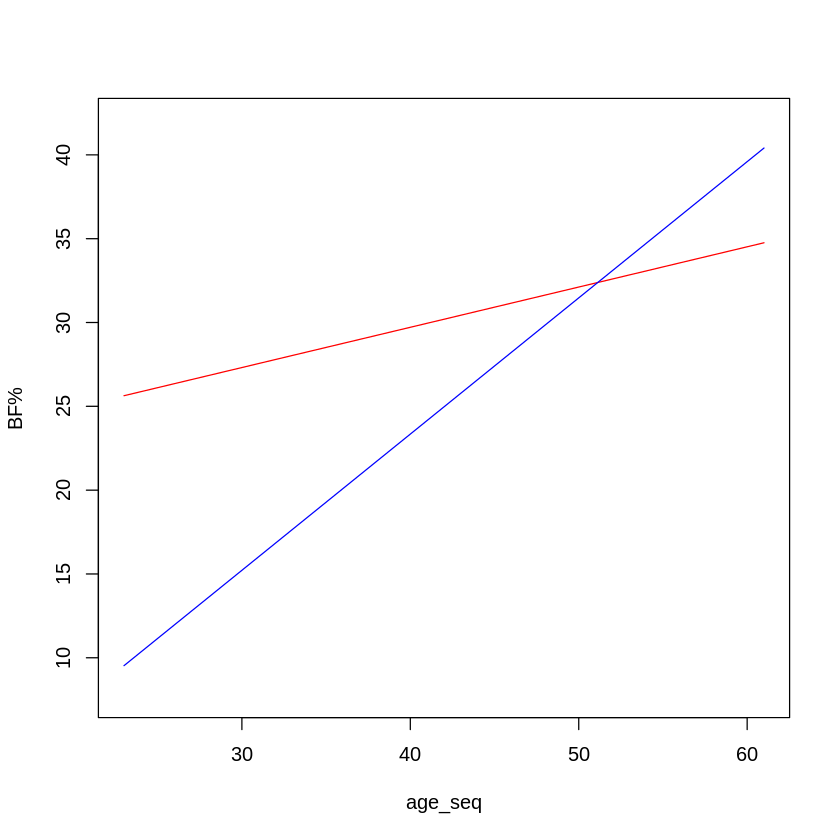

In [ ]:
age_seq <- seq(from=min(d$Age), to=max(d$Age), by=1)

for_females <- coef(m_sum)[1] + coef(m_sum)[2]*age_seq
for_males <- for_females + coef(m_sum)[3] + coef(m_sum)[4]*age_seq

plot(for_females ~ age_seq, type="l", col="red", ylim=range(d$Percent.Fat), ylab="BF%")
lines(for_males ~ age_seq, col="blue")

#### Answer to 3.18, 4

***Interpret each coefficient in this model.***

In [ ]:
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


* **`Intercept`**: For `Females` of `Age == 0`, `Percent.Fat == 20.1116 ± 6.2395`.  There is a `p-value == 0.00613` probability that the actual value is `0`. (This is an interesting consequence of regression.  Some sort of absurdity must occur, depending on when we start counting age.  For instance, if `Age == 0` corresponds to the moment of birth, it makes sense that the baby could have `Percent.Fat == 20.1116 ± 6.2395`, but there is actually 0% chance, `p-value == 0.0000`, that `Percent.Fat == 0`.  If we start counting at conception, I'm not sure it makes sense to say that `Percent.Fat > 0` such that the probability that `Percent.Fat == 0` is 100%, `p-value == 1.000`.)
* **`Age`**: Increasing `Age` is associated with a `0.2401 ± 0.1204` increase in `Percent.Fat`/year across both sexes.  There is a `p-value == 0.06600` probability that the actual value is `0`. (Given what we intuit about physiology through the lifespan, we might conclude that there is actually a `p-value == 0.0000` probability the `Age` has `0` association with `Percent.Fat`.)
* **`GenderM`**: `Males` have an adjusted average `29.2692 ± 10.4098` less `Percent.Fat` than `Females` at a p-value of `0.01386`.
* **`Age:GenderM`**:Also for `Males`, increasing `Age` is associated with a `0.5725 ± 0.2893` increase in `Percent.Fat`/year above and beyond `Females` at a p-value of `0.06790`.

#### Answer to 3.18, 5

***Use a t-test to determine if the interaction term is significant.***

First,  a little detour.  If you go back to the figure we generated for part 3, we see evidence of an interaction: the different slopes for females (red) and  males (blue).

In this case, we can get the t-test result from our `summary()` function.

In [ ]:
m_sum


Call:
lm(formula = Percent.Fat ~ Age * Gender, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6756 -2.8862 -0.2464  1.9100  9.1641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  20.1116     6.2395   3.223  0.00613 **
Age           0.2401     0.1204   1.994  0.06600 . 
GenderM     -29.2692    10.4098  -2.812  0.01386 * 
Age:GenderM   0.5725     0.2893   1.978  0.06790 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 14 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.7591 
F-statistic: 18.86 on 3 and 14 DF,  p-value: 3.455e-05


We see that the `t value == 1.978` with a `p-value == 0.06790`.

But let's replicate this manually.  Recall that the t-statistic for a coefficient is

$$t_{\beta} = \frac{\hat{\beta} - \beta_0}{\sigma_{\beta}}$$

where here, $\beta_0 = 0$.  So let's code this.

In [ ]:
t_beta <- (m_sum$coef["Age:GenderM", "Estimate"] - 0) / m_sum$coef["Age:GenderM", "Std. Error"]
t_beta

[1] 1.978474

We've replicated the same `t value`.  Now we need to get the `p-value` for this.

In [ ]:
2 * # Mutliply by 2 for 2-sided t-test
  pt(t_beta,
     df=nrow(d) - 4, # df = number of observation - estimated terms
     lower.tail=FALSE)

[1] 0.06789632

This matches our `p-value` from `m_sum`.

#### Answer to 3.18, 6

***Use an F-test to determine if the interaction term is significant.***

Unlike the t-test, F-tests for coefficients are not part of the `summary()` output.  One thing we *could* do is simply sqare the t-stat since $F = t^2$.

In [ ]:
(F_stat <- t_beta^2)
pf(F_stat,
   df1=1,
   df2=nrow(d)-4,
   lower.tail=FALSE)

[1] 3.914359

[1] 0.06789632

Alternatively, we could use the `anova` command.

In [ ]:
anova(m)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,891.87365,891.87365,44.273608,1.089288e-05
Gender,1,168.78671,168.78671,8.378761,1.176673e-02
Age:Gender,1,78.85316,78.85316,3.914359,6.789632e-02
Residuals,14,282.02425,20.14459,NA,NA


#### Answer to 3.18, 7

***Show that the P-values for the t- and F-tests are the same for the interaction term, and explain why. Also show that the square of the t-statistic is the F-statistic (within the limitations of computer arithmetic).***

See above.

#### Answer to 3.18, 8

***To the earlier plot, add the separate regression lines for males and females.***

We've more or less done this above.

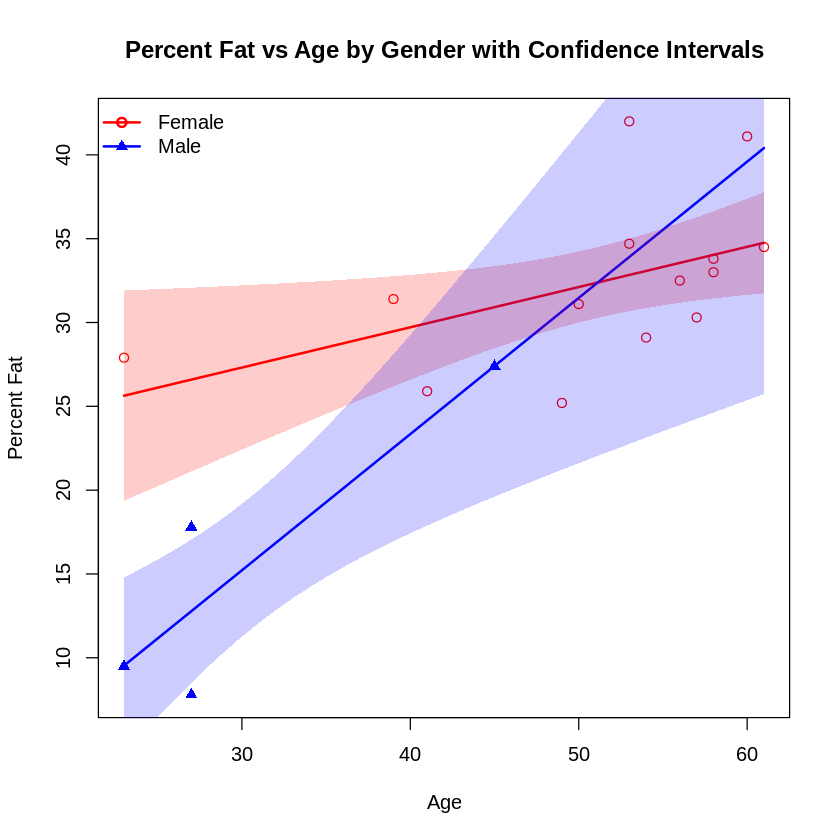

In [ ]:
Gender_colors <- ifelse(d$Gender == "F", "red", "blue")
Gender_pch <- ifelse(d$Gender == "F", 1, 17)

plot(
  Percent.Fat ~ Age,
  col = Gender_colors,
  pch = Gender_pch,
  data = d,
  xlab = "Age",
  ylab = "Percent Fat",
  main = "Percent Fat vs Age by Gender with Confidence Intervals"
)

age_seq <- seq(from = min(d$Age), to = max(d$Age), by = 1)
newdata_female <- data.frame(Age = age_seq, Gender = "F")
newdata_male <- data.frame(Age = age_seq, Gender = "M")

pred_female <- predict(m, newdata_female, interval = "confidence", level=0.90)
pred_male <- predict(m, newdata_male, interval = "confidence", level=0.90)

lines(age_seq, pred_female[, "fit"], col = "red", lwd = 2)
lines(age_seq, pred_male[, "fit"], col = "blue", lwd = 2)
polygon(
  c(age_seq, rev(age_seq)),
  c(pred_female[, "lwr"], rev(pred_female[, "upr"])),
  col = adjustcolor("red", alpha.f = 0.2),
  border = NA
)
polygon(
  c(age_seq, rev(age_seq)),
  c(pred_male[, "lwr"], rev(pred_male[, "upr"])),
  col = adjustcolor("blue", alpha.f = 0.2),
  border = NA
)

legend(
  "topleft",
  legend = c("Female", "Male"),
  col = c("red", "blue"),
  pch = c(1, 17),
  lwd = 2,
  bty = "n"
)


#### Answer to 3.18, 9

***Compute and plot the 90% confidence intervals about the fitted values for both males and females, and comment***

We found this for the plotting in part 7.  There is quite a bit of overlap as `Age` increases.

#### Answer to 3.18, 10

***Argue that only using the females in the study is sensible. Furthermore, argue that only using females aged over 38 is sensible.***

I'm not sure that it *is* sensible to use only females or only females > 38 yo; it really depends on whether or not we think there is a difference between males and females, and if people/females <= 38 yo differ from people/females >38 yo.  Having said that, I'm sure the answer the book wants is that *it's sensible given the limited data outside of these criteria*.

#### Answer to 3.18, 11

***Using this subset of the data, find a model using `Age` and `BMI` as explanatory variables.***

In [ ]:
m_sub <- lm(Percent.Fat ~ Age*BMI, data=d[d$Gender=="F" & d$Age>38,])

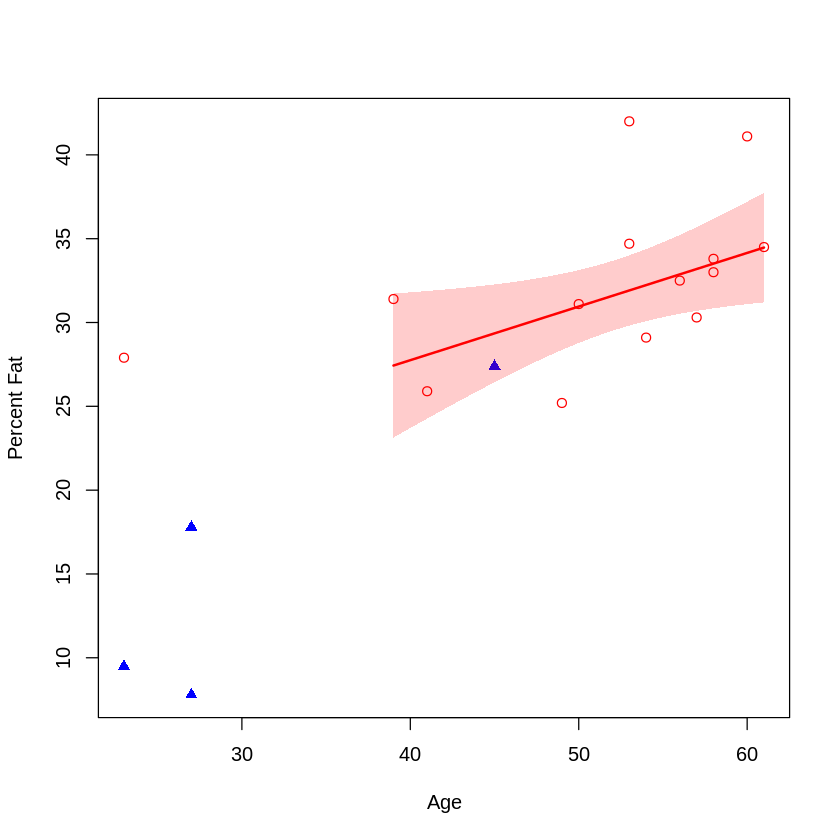

In [ ]:
plot(
  Percent.Fat ~ Age,
  col = Gender_colors,
  pch = Gender_pch,
  data = d,
  xlab = "Age",
  ylab = "Percent Fat"
)

age_seq.sub <- seq(from = 39, to = max(d$Age), by = 1)
newdata_female <- data.frame(Age = age_seq.sub, BMI = median(d$BMI), Gender = "F") # arbitrary BMI

pred_female <- predict(m_sub, newdata_female, interval = "confidence", level=0.90)

lines(age_seq.sub, pred_female[, "fit"], col = "red", lwd = 2)
polygon(
  c(age_seq.sub, rev(age_seq.sub)),
  c(pred_female[, "lwr"], rev(pred_female[, "upr"])),
  col = adjustcolor("red", alpha.f = 0.2),
  border = NA
)

#### Answer to 3.18, 12

***Using this model, compute Cook’s distance, leverages, Studentized residuals and standardized residuals to evaluate the model. Identify any outliers and influential observations, and discuss the differences between the Studentized and standardized residuals.***

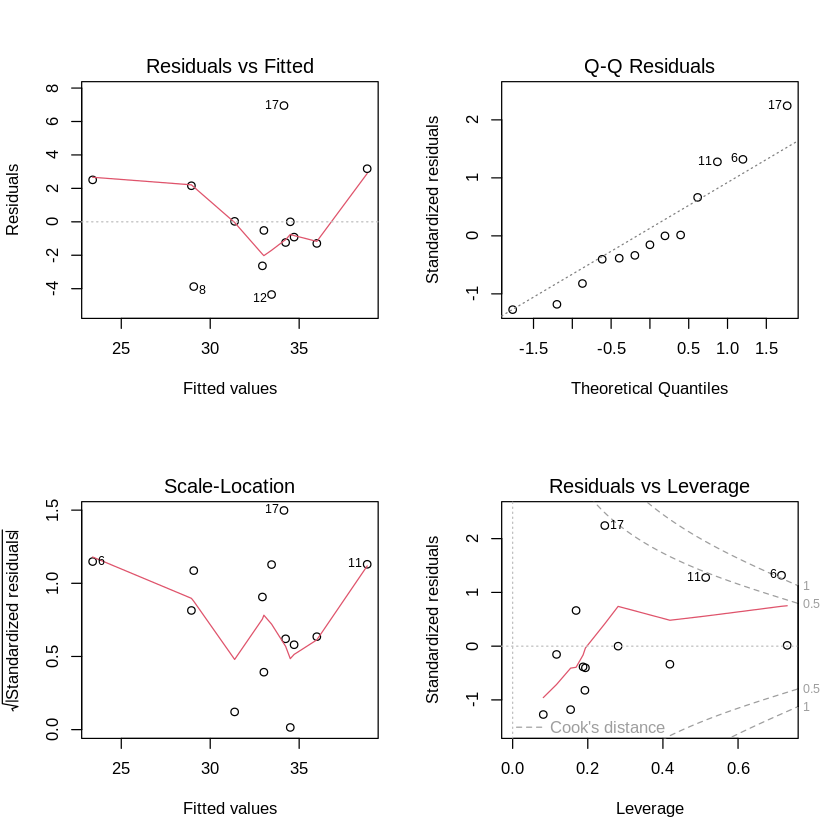

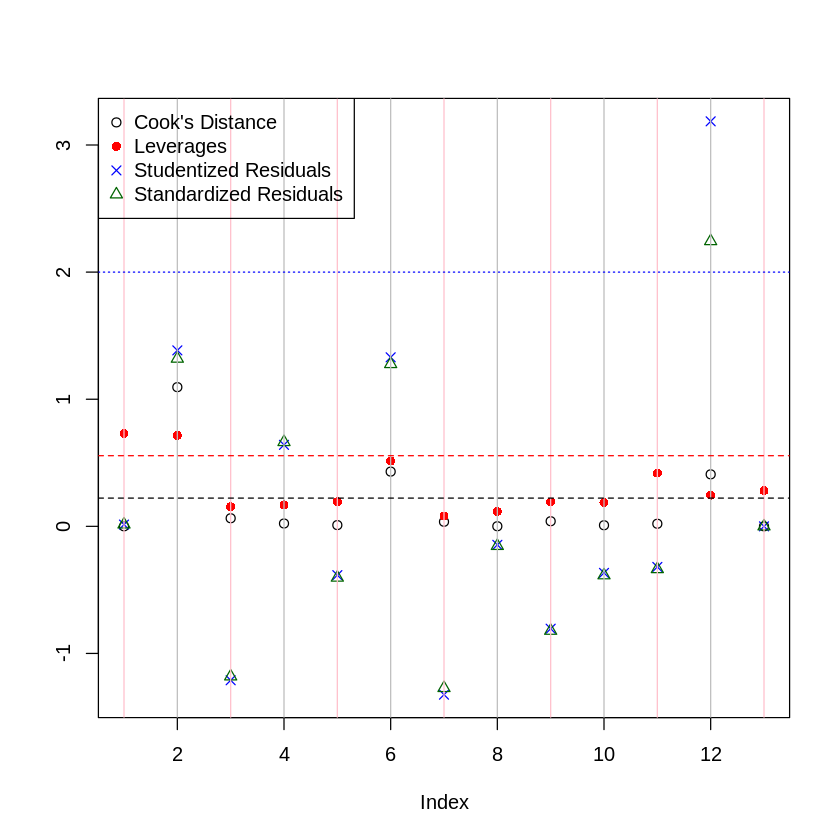

In [ ]:
par(mfrow=c(2,2))
plot(m_sub)

cooks_d <- cooks.distance(m_sub)
leverages <- hatvalues(m_sub)
studentized_residuals <- rstudent(m_sub)
standardized_residuals <- rstandard(m_sub)

par(mfrow=c(1,1))
plot(cooks_d,
    ylim=c(min(c(cooks_d, leverages, studentized_residuals, standardized_residuals)),
          max(c(cooks_d, leverages, studentized_residuals, standardized_residuals))),
          ylab="")
points(leverages, col="red", pch=16)
points(studentized_residuals, col="blue", pch=4)
points(standardized_residuals, col="darkgreen", pch=2)
abline(v=1:nrow(d), col=c("pink", "grey"))
abline(h=4/nrow(d), col="black", lty=2) # High influence points (cook's distance)
abline(h=(2*(length(coef(m_sub))+1)/nrow(d)), col="red", lty=2) # High leverage points
abline(h=2, col="blue", lty=3); abline(h=-2, col="blue", lty=2) # High studentized residuals (outliers)
legend("topleft",
       legend = c("Cook's Distance", "Leverages", "Studentized Residuals", "Standardized Residuals"),
       col = c("black", "red", "blue", "darkgreen"),
       pch = c(1, 16, 4, 2))

## Question 3.19

A study of urethral length $L$ and mass $M$ of various mammals [41] expected to find isometric scaling; that is, proportional relationships being maintained as the size of animals increases. For these data (Table 3.11; data set: `urinationL`) then, one postulated relationship is $L = kM^{1/3}$ for some proportionality constant $k$. By using a transformation, fit an appropriate weighted linear regression model, and test the hypothesis using both a t-test and an F-test. Interpret your model.

### Answer to 3.19

In [ ]:
#install.packages("GLMsData")
library(GLMsData)

data(urinationL)
d <- urinationL
d$m.1_3 <- (d$Mass)^(1/3)
head(d)

,Animal,Sex,Mass,Length,SampleSize,m.1_3
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,Mouse,F,0.02,10.0,1,0.2714418
2,Wister Rat,F,0.20,9.5,20,0.5848035
3,Rat,F,0.20,17.0,1,0.5848035
4,Sprague-Dawley Rat,F,0.30,20.0,61,0.6694330
5,Dunkin Hartley Guinea Pig,M,0.40,20.0,1,0.7368063
6,Normal Adult Cat,F,2.30,49.4,1,1.3200061


In [ ]:
m <- lm(Length ~ 0 + m.1_3, data=d)
summary(m)


Call:
lm(formula = Length ~ 0 + m.1_3, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-303.20  -80.45  -33.94    3.18  345.59 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
m.1_3   74.282      2.138   34.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 109.9 on 46 degrees of freedom
Multiple R-squared:  0.9633,	Adjusted R-squared:  0.9625 
F-statistic:  1207 on 1 and 46 DF,  p-value: < 2.2e-16


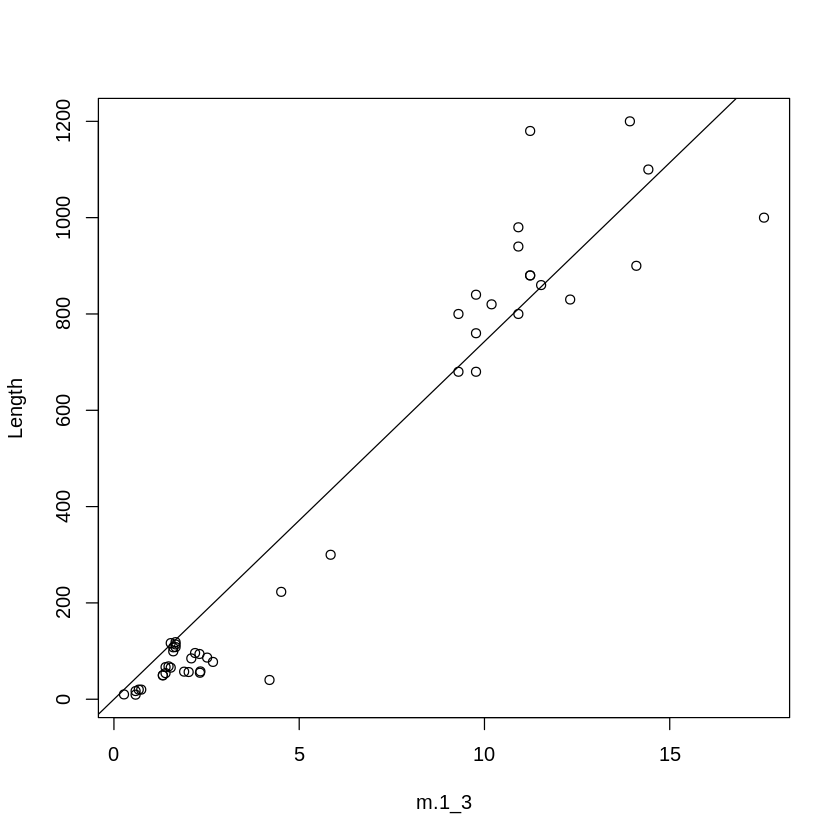

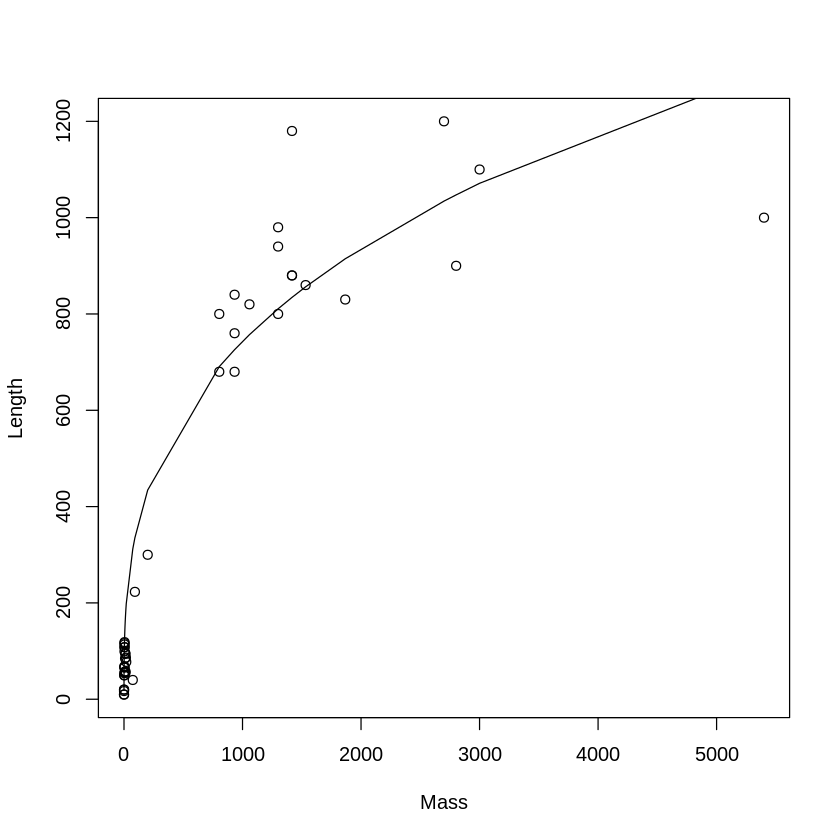

In [ ]:
plot(Length ~ m.1_3, data=d)
abline(m)

plot(Length ~ Mass, data=d)
lines(coef(m)[1]*Mass^(1/3) ~ Mass, data=d)

## Question 3.20

A study of the annual rainfall between 1916 and 1990 in a wheatgrowing region of eastern Australia [6] explored the relationships between mean annual rainfall `AR` and region `Region`, altitude `Alt`, latitude `Lat` and longitude `Lon` (Table 3.12; data set: `wheatrain`).

1. Plot the annual rainfall against the region and altitude, and identify any important features.
2. Interpret a regression model with systematic component `AR ~ Alt * Region`.
3. Fit the model with systematic component `AR ~ Alt * Region`. Show that the interaction term is not necessary in the model, but both main effect terms are necessary.
4. Produce diagnostic plots and evaluate the fitted model. Use both standardized and Studentized residuals, and compare. Identify the observation that appears to be an outlier.
5. The data are spatial, so examine the independence of the data by plotting the residuals against `Lon` and against `Lat`. Comment.
6. Summarize the diagnostic analysis of the fitted model.

### Answers to 3.20

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(wheatrain)
d <- wheatrain
head(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Station,Alt,Lat,Lon,AR,Region
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Goondiwindi,216,28.53,150.30,529,3
2,Condobolin,199,33.08,147.15,447,1
3,Coonamble,180,30.97,148.38,505,1
4,Gilgandra,278,31.72,148.67,563,2
5,Nyngan,177,31.56,147.20,440,1
6,Trangie,219,32.03,147.99,518,1


What is `Region`?

In [ ]:
?wheatrain

Region is, apparently, "the station's region as computed...using a principle component analysis based on monthly rainfall".

This is a little troubling because it seems like we might be using something like *monthly* rainfall to predict *yearly* rainfall.  This isn't necessarily the case, though; this description is pretty vague so hopefully they are using something useful.

But notice that in our dataset, `Region` is coded as an integer.  I think we need to change this to a factor, since there doesn't seem to be any way in which higher-numbered regions are more than lowered-numbered regions.

In [ ]:
d$Region <- as.factor(d$Region)
head(d)

,Station,Alt,Lat,Lon,AR,Region
,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,Goondiwindi,216,28.53,150.30,529,3
2,Condobolin,199,33.08,147.15,447,1
3,Coonamble,180,30.97,148.38,505,1
4,Gilgandra,278,31.72,148.67,563,2
5,Nyngan,177,31.56,147.20,440,1
6,Trangie,219,32.03,147.99,518,1


#### Answer to 3.20, 1

***Plot the annual rainfall against the region and altitude, and identify any important features.***

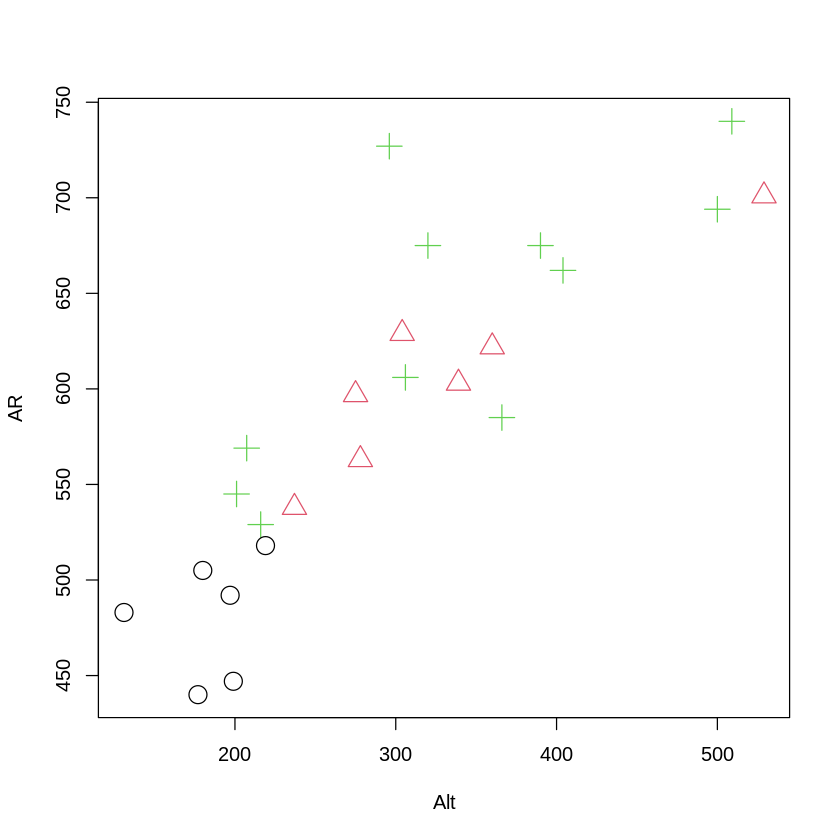

In [ ]:
plot(AR ~ Alt, col=Region, pch=as.integer(Region), cex=2, data=d)

#### Answer to 3.20, 2

***Interpret a regression model with systematic component `AR ~ Alt * Region`.***

This systematic component means "Average rainfail is a linear function of altitude and region".

#### Answer to 3.20, 3

***Fit the model with systematic component `AR ~ Alt * Region`. Show that the interaction term is not necessary in the model, but both main effect terms are necessary.***

I don't like these types of questions; what do we mean by "need"?

If, by *need*, we mean *fit the data better than other models on offer*, then we could determine that the interaction term is not *needed* since
* a) the interaction terms in `m3` are not significant but the main effects in `m2` are, and
* b) an F-test comparison between `m2` vs `m3` finds that the additional interaction terms in `m3` don't significantly improve fit.



In [ ]:
m2 <- lm(AR ~ Alt + Region, data=d)
summary(m2)$coef

m3 <- lm(AR ~ Alt*Region, data=d)
summary(m3)$coef

anova(m2, m3)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),388.5231144,23.32297590,16.658385,3.428485e-13
Alt,0.5021408,0.09266974,5.418606,2.646227e-05
Region2,52.4810340,25.67176238,2.044310,5.431332e-02
Region3,78.8765445,24.40503285,3.231979,4.179460e-03


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),439.3912156,113.3675945,3.87580964,0.001107541
Alt,0.2254331,0.6099662,0.36958294,0.716005463
Region2,2.3920870,128.0556323,0.01868006,0.985301842
Region3,24.0484194,120.9610765,0.19881122,0.844638782
Alt:Region2,0.2743588,0.6341255,0.43265702,0.670403308
Alt:Region3,0.2884323,0.6215501,0.46405317,0.648172656


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,30449.18,NA,NA,NA,NA
2,18,30088.76,2,360.4179,0.1078064,0.8983767


But are the main effect *needed*?  To assess this, we'd need to perform the same type of comparisons.

Are main effects necessary at all?

In [ ]:
m0 <- lm(AR ~ 1, data=d)

anova(m0, m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23,173105.62,NA,NA,NA,NA
2,20,30449.18,3,142656.4,31.23378,9.616331e-08


It seems so.  Are both main effects necessary?

In [ ]:
m1A <- lm(AR ~ Alt, data=d)

m1R <- lm(AR ~ Region, data=d)

anova(m1A, m2)
anova(m1R, m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22,46585.87,NA,NA,NA,NA
2,20,30449.18,2,16136.69,5.299547,0.01423031


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,75150.55,NA,NA,NA,NA
2,20,30449.18,1,44701.37,29.36129,2.646227e-05


Again, yes.

But what if, by *need*, we mean *needed to best fit out-of-sample data*?

The approximation we have for this is AIC.

In [ ]:
AIC(m0); AIC(m1A); AIC(m1R); AIC(m2); AIC(m3)

[1] 285.3155

[1] 255.813

[1] 269.2897

[1] 249.6073

[1] 253.3215

Here, `m2` (the model with main effects but no interaction) does (marginally) best.  This would support the contention that the interactions are not needed but the main effects are.

But what if we mean *needed to model a `AR`, which we have reason to believe--which exists outside of the current data--contains an interaction between `Alt` and `Region`*?  Now, we cannot rely on any of these tests because they can only operate on the existing data...and our reason for believing in the existence of an interaction is outside of this data.  In this context, the legitimacy of a model that does or does not contain an interaction term depends on subject-matter knowledge...not tests.

#### Answer to 3.20, 4

***Produce diagnostic plots and evaluate the fitted model. Use both standardized and Studentized residuals, and compare. Identify the observation that appears to be an outlier.***

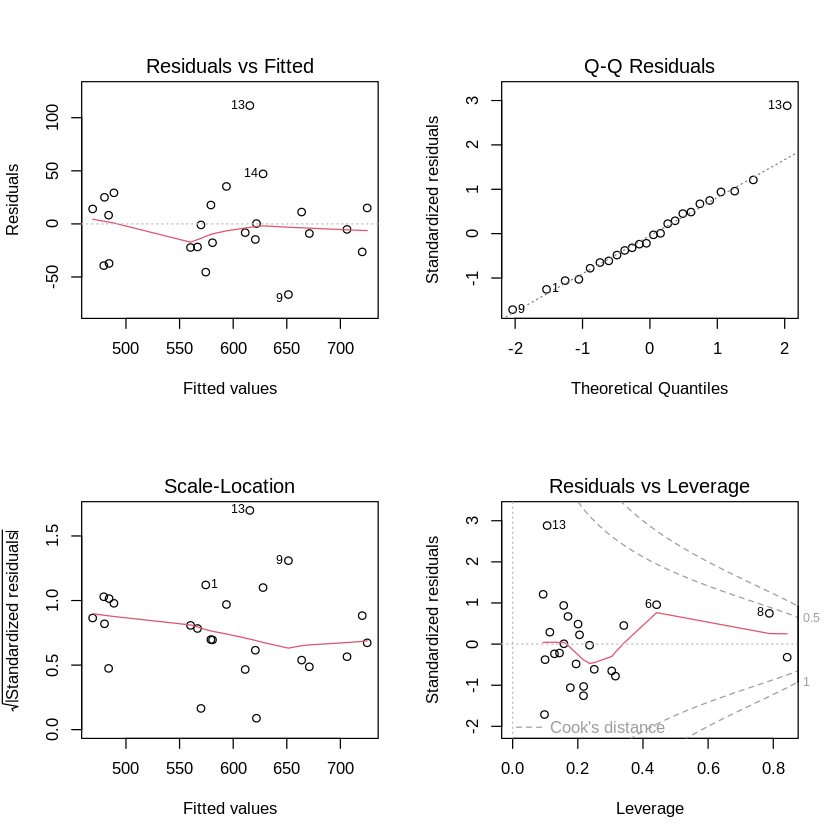

In [ ]:
par(mfrow=c(2,2))
plot(m3)

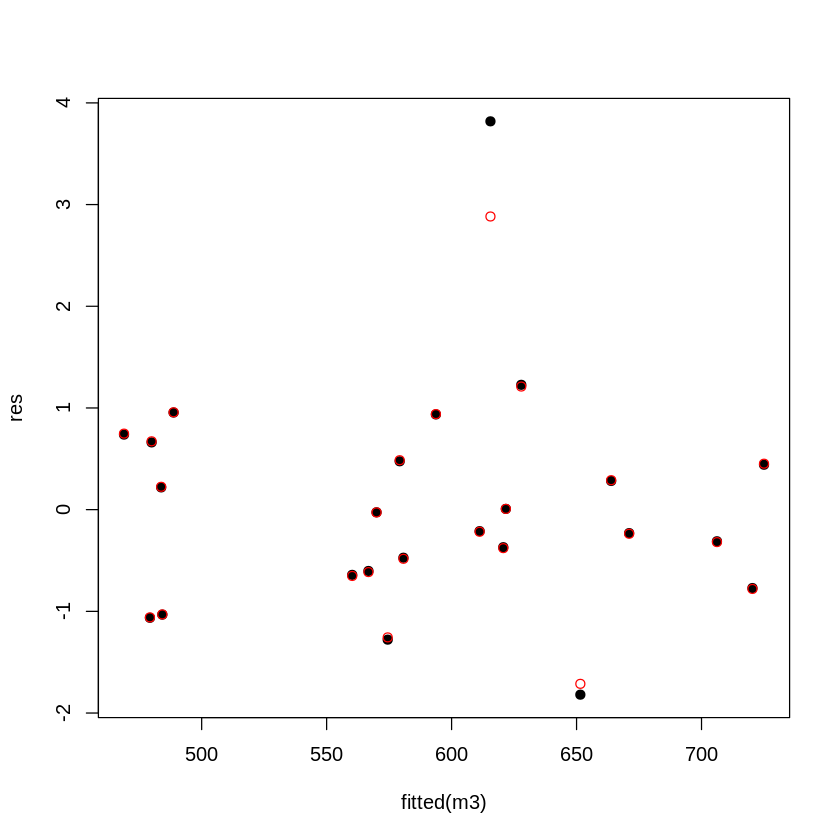

In [ ]:
plot(rstudent(m3) ~ fitted(m3), pch=19, ylab="res")
points(rstandard(m3) ~ fitted(m3), col="red")

Observation 13.

#### Answer to 3.20, 5

***The data are spatial, so examine the independence of the data by plotting the residuals against `Lon` and against `Lat`. Comment.***

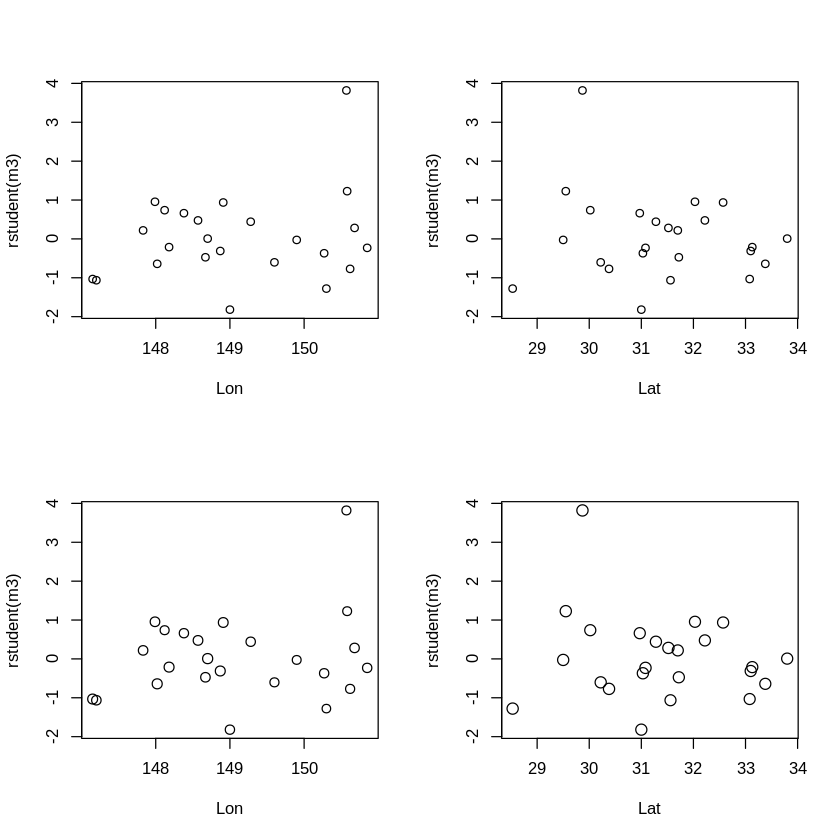

In [ ]:
par(mfrow=c(2,2))
plot(rstudent(m3) ~ Lon*Lat, data=d)
plot(rstudent(m3) ~ Lon, cex=Lat/25, data=d)
plot(rstudent(m3) ~ Lat, cex=Lon/100, data=d)

I think, if you squint your eyes, there may be a parabolic shape to `rstudent(m3) ~ Lon`.

In [ ]:
res_lon.lm <- lm(rstudent(m3) ~ poly(d$Lon, 2))
summary(res_lon.lm)


Call:
lm(formula = rstudent(m3) ~ poly(d$Lon, 2))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8795 -0.5963 -0.1635  0.5759  3.4900 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)      0.03896    0.23150   0.168    0.868
poly(d$Lon, 2)1  1.17917    1.13411   1.040    0.310
poly(d$Lon, 2)2 -0.18401    1.13411  -0.162    0.873

Residual standard error: 1.134 on 21 degrees of freedom
Multiple R-squared:  0.05009,	Adjusted R-squared:  -0.04038 
F-statistic: 0.5537 on 2 and 21 DF,  p-value: 0.583


Regression doesn't strongly support this.  I would be surprised if it did; I'm not an expert here, but I wouldn't think that `AR` would follow a monotonic pattern moving East or West (afterall, go far enough in either position and you end up back where you started).  

#### Answer to 3.20, 6

***Summarize the diagnostic analysis of the fitted model.***